# Analysis of Racial Equity in San Diego Criminal Justice System

Jiayi Zhao (A15814036)

Chancellor's Research Scholarship for Social Sciences

## Abstract 

The California Racial Justice Act (RJA) approved in 2020 which prohibits state prosecutors from racially discriminating against suspects, prosecutors are not allowed to prosecute suspects as long as they can prove that law enforcement officials discriminated against them; even if a suspect is convicted, a retrial is available. However, the RJA does not mandate the publication of aggregated data on racial disparity allegations, convictions, and sentences, as well as defining acceptable statistical methods to demonstrate racial disparity. This project is a preliminary search to find out what aspects of criminal justice data might be useful to those citing the CRJA. Accordingly, this project aims to seek and disclose data on the racial composition of charges, convictions, and sentences in San Diego County and its municipalities through the submission of Public Records Act (PRA) and Freedom of Information Act (FOIA) requests, as well as data analyzed using the Pandas python library. 

To some extent, this project will include a precise analysis on the traffic stop reason and resultant charges related in Homlessness in San Diego from traffic stop data collected under the Racial and Identity Profiling Act of 2015 (RIPA) to investigate any statistical evidence of racial bias affecting the outcomes of different stop reasons and their resultant charges. However, we aren’t yet sure if this preliminary analysis has conclusively demonstrated there may be a racial disparity in the traffic stop enforcement.

## Table of Contents

1. ### [Introduction](#intro)
2. ### [Methods](#methods)
3. ### [Preliminary Analysis on Targeted Enforcement for Homlessness](#ripa_homeless)
    - #### [Automated Keyword Parsing System](#keyword)
    - #### [Exploratory Data Analysis](#eda)
    - #### [Geospatial Analysis](#geo)
4. ### [Preliminary CDCR Data Breakdowns and Analysis](#cdcr)
5. ### [Results & Discussion](#res)
4. ### [References](#ref)

## Introduction <a id='intro'></a>

California Governor Gavin Newsom signed several laws after taking office in 2019 to promote racial equality and justice. Among them, the California Racial Justice Act (AB 2542), proposed by Assemblyman Ash Kalra in the South Bay constituency, was also signed by Newsom in September 2020, which would prohibit the use of race or ethnicity to seek or obtain a conviction or sentence. This new law prohibits state prosecutors from racially discriminating against suspects, prosecutors are not allowed to prosecute suspects as long as they can prove that law enforcement officials discriminated against them; even if a suspect is convicted, a retrial is available.

However, the only public race and ethnicity related data set in San Diego county is the traffic stop data under the Racial and Identity Profiling Act (RIPA) from the San Diego Police Department. There are researchers and journalists utilizing the traffic stop data to analyze whether there exists racial “bias affecting the outcomes of police stops and the resultant charges” [[2](#ref2)]. "Stopped by police in San Diego? A lot depends on where you live, drive" by data reporters Greg Moran, et al from the San Diego Union-Tribune found out that police over-patrol was found in large minority population neighborhood which means that some areas with large minority populations saw more enforcement than mostly White areas with similar crime totals [[1](#ref1)]. In addition, the Black/African American community was vastly overrepresented in the stop data comparing to overall population of San Diego according to “The California Racial Justice Act & San Diego PD RIPA Data” by Sreetama Chowdhury.

However, the results of the two projects are not necessarily applicable to the entire court system. Data from traffic stops is far from the only source that enters the criminal justice system. Even if any evidence of bias were found, it would not necessarily stand up in court.

We are the first team that tries to find out what aspects of criminal justice data might be helpful to those citing the RJA. The goal of this research is to seek acceptable statistical methods for demonstrating racial disparities by starting with the homelessness group in San Diego. We argue that by intentionally targeting the homeless, law enforcement is intentionally targeting minorities, who are known to be overrepresented in the homeless population. RJA motions can get the demographics before the court and the public to help influence the policymakers to end the criminalization of homeless people. In the meantime, we are seeking and disclosing more data on the racial composition of charges, convictions, and sentences in San Diego County and its municipalities through the submission of Public Records Act (PRA) and Freedom of Information Act (FOIA) requests, as well as data analyzed using the Pandas python library.

## Methods <a id='methods'></a>

In this project, we are mainly using Python’s Pandas software library for data manipulation and analysis.

Using the RIPA stop data, we created an automated keyword parsing system that pulls out data involved with the penal code that might be used against homeless people. After we pulled out homless-related data, we ran an exploratory data analysis (EDA) and geospatial analysis to have a preliminary analysis on targeted enforcement for homelessness.

On the other hand, we cleaned and had a preliminary analysis on the CA Department of Corrections and Rehabilitation sentencing data within 10 years that we just received on August 24th, 2022.

## Preliminary Analysis on Targeted Enforcement for Homlessness <a id='ripa_homeless'></a>

### Data Cleaning
#### Import RIPA Data
Note: RIPA traffic stop data used can be found, explained, and downloaded [here](https://data.sandiego.gov/datasets/police-ripa-stops/).

In [1]:
# import + consolidate San Diego RIPA data into one massive dataframe (df)
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
import seaborn as sns
import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from loadRIPA import *
# df = loadRIPA()
# df['year-month'] = pd.to_datetime(df.date_stop, format='%Y-%m-%d').dt.strftime("%Y-%m")

In [3]:
# df.head()

In the RIPA data, we see that each row per outcome per person by Police. A stop may have more than one outcome and involve multiple people. Therefore, we aggregate the dataframe into each row represents each person per stop by Police with all the resulted outcomes of the stop, and both a `pid` (a unique identifier for the person) and a `stop_id` (a unique identifier for the stop). In addition, we also create a column called `highest_outcome` to check the highest outcome of the person from the stop.

In [4]:
# def select_highest_outcome(str_list):
#     priority_list = ['Arrested', 'Transported', 'Citation', 'Warning', 'Referred to school', 'Parents Contacted', 'No Action']
#     for priority_str in priority_list:
#         if priority_str in str_list:
#             return priority_str
#     return None

# def select_highest_outcome_type(str_list):
#     priority_list = ['Felony', 'Misdemeanor', 'Infraction', 'No Action']
#     for priority_str in priority_list:
#         if priority_str in str_list:
#             return priority_str
#     return None

In [5]:
# # First, we categorized each stop outcome into 3 groups: arrested, citation, and warning
# outcome_trans = {'Citation for infraction':'Citation', 'In-field cite and release':'Citation', 
#          'Custodial Arrest without warrant':'Arrested', 'Contacted U.S. Department of Homeland Security':'Arrested',
#          'Psychiatric hold':'Arrested', 'Custodial Arrest pursuant to outstanding warrant':'Arrested', 
#          'Warning (verbal or written)':'Warning', 'Field interview card completed':'No Action', 'No Action':'No Action',
#          'Noncriminal transport or caretaking transport':'Transported',  
#          'Contacted parent/legal guardian or other person responsible for the minor':'Parents Contacted',
#          'Referral to school administrator':'Referred to school', 
#          'Referral to school counselor or other support staff':'Referred to school'}

# def map_outcome(x):
#     if pd.isna(x):
#         return 'NaN'  # You can use a different value if desired
#     return outcome_trans.get(x, 'Other')

# df['outcome'] = df['result'].apply(map_outcome)

# type_trans = {'M':'Misdemeanor', 'X':'No Action', 'I':'Infraction', 'F':'Felony'}
# temp = df['resulttext'].str.split().apply( lambda x: x[-2][-2] if type(x)==list else 'X')
# df['type'] = temp.apply( lambda x: type_trans[x])

# df = df.drop(columns=['resultkey', 'result','stop_in_response_to_cfs','officer_assignment_key',
#                          'assignment','isstudent', 'isschool','school_name','perceived_gender',
#                          'gender_nonconforming','gend','gend_nc'])

In [6]:
# # Define the aggregation functions for each column
# agg_funcs = {'stop_id': 'first', 'pid': 'first', 'gender':'first', 'ori': 'first', 'agency': 'first', 
#              'exp_years': 'first', 'date_stop': 'first', 'time_stop': 'first', 'stopduration': 'first',
#              'race':lambda x: list(x.unique()),  'outcome': lambda x: list(x.unique()),
#              'code':lambda x: list(x.unique()), 'resulttext':lambda x: list(x.unique()),
#              'action':lambda x: list(x.unique()), 'consented':lambda x: list(x.unique()),
#              'reason_for_stop':lambda x: list(x.unique()), 'reason_for_stopcode':lambda x: list(x.unique()),
#              'reason_for_stop_code_text':lambda x: list(x.unique()), 'reason_for_stop_detail':lambda x: list(x.unique()), 
#              'reason_for_stop_explanation':lambda x: list(x.unique()), 'type': lambda x: list(x.unique()),
#              'intersection': 'first', 'address_block': 'first', 'land_mark': 'first', 
#              'address_street': 'first','highway_exit': 'first', 'address_city': 'first', 
#              'beat': 'first','beat_name': 'first', 'perceived_limited_english': 'first',
#              'perceived_lgbt': 'first', 'year-month': 'first', 'perceived_age': 'first'
#              }

# df = df.groupby(['stop_id', 'pid'], as_index=False,group_keys=False).agg(agg_funcs)

# df['highest_outcome'] = df['outcome'].apply(select_highest_outcome)
# df['highest_type'] = df['type'].apply(select_highest_outcome_type)
# df['race'] = df['race'].apply(lambda x: ['White', 'White, not Hispanic or Latino'] if x == ['White'] else x)

# df.drop(index= df.index[df['race'] =='[nan]'].tolist())
# df.to_csv('df.csv')

In [7]:
# calling the stored cleaned dataframe
import ast
def restore_list(x):
    try:
        # Evaluate the string as a list
        result = ast.literal_eval(x)
        # If the list is [nan], replace it with [np.nan]
        if result == [np.nan]:
            return [np.nan]
        return result
    except (SyntaxError, ValueError):
        return x

converters = {'outcome': restore_list, 'race': restore_list, 'code': restore_list, 'resulttext': restore_list, 
              'action': restore_list, 'consented': restore_list, 'reason_for_stop': restore_list, 'type': restore_list,
              'reason_for_stopcode': restore_list, 'reason_for_stop_code_text': restore_list, 
              'reason_for_stop_detail': restore_list, 'reason_for_stop_explanation': restore_list}
df = pd.read_csv('df.csv', converters=converters).drop(['Unnamed: 0'], axis = 1)

After storing the dataframe, we want to check the timeframe of the dataset and how much data is missing in each column.

In [8]:
df = df.drop(index= df.index[df['race'] =='[nan]'].tolist())
print(df.shape)
df.head()

(706068, 35)


,stop_id,pid,gender,ori,agency,exp_years,date_stop,time_stop,stopduration,race,...,highway_exit,address_city,beat,beat_name,perceived_limited_english,perceived_lgbt,year-month,perceived_age,highest_outcome,highest_type
0,2443,1,Male,CA0371100,SD,10,2018-07-01,00:01:37,30,"[White, White, not Hispanic or Latino]",...,NaN,SAN DIEGO,122.0,Pacific Beach 122,0,No,2018-07,25,Arrested,Misdemeanor
1,2444,1,Male,CA0371100,SD,18,2018-07-01,00:03:34,10,"[White, White, not Hispanic or Latino]",...,NaN,SAN DIEGO,121.0,Mission Beach 121,0,No,2018-07,25,Warning,Infraction
2,2447,1,Male,CA0371100,SD,1,2018-07-01,00:05:43,15,[Hispanic/Latino/a],...,NaN,SAN DIEGO,822.0,El Cerrito 822,0,No,2018-07,30,No Action,No Action
3,2447,2,Female,CA0371100,SD,1,2018-07-01,00:05:43,15,[Hispanic/Latino/a],...,NaN,SAN DIEGO,822.0,El Cerrito 822,0,No,2018-07,30,No Action,No Action
4,2448,1,Male,CA0371100,SD,3,2018-07-01,00:19:06,5,"[White, White, not Hispanic or Latino]",...,NaN,SAN DIEGO,614.0,Ocean Beach 614,0,No,2018-07,23,No Action,No Action


In [9]:
pd.to_datetime(df['date_stop']).min(), pd.to_datetime(df['date_stop']).max()

(Timestamp('2018-07-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))

<Axes: >

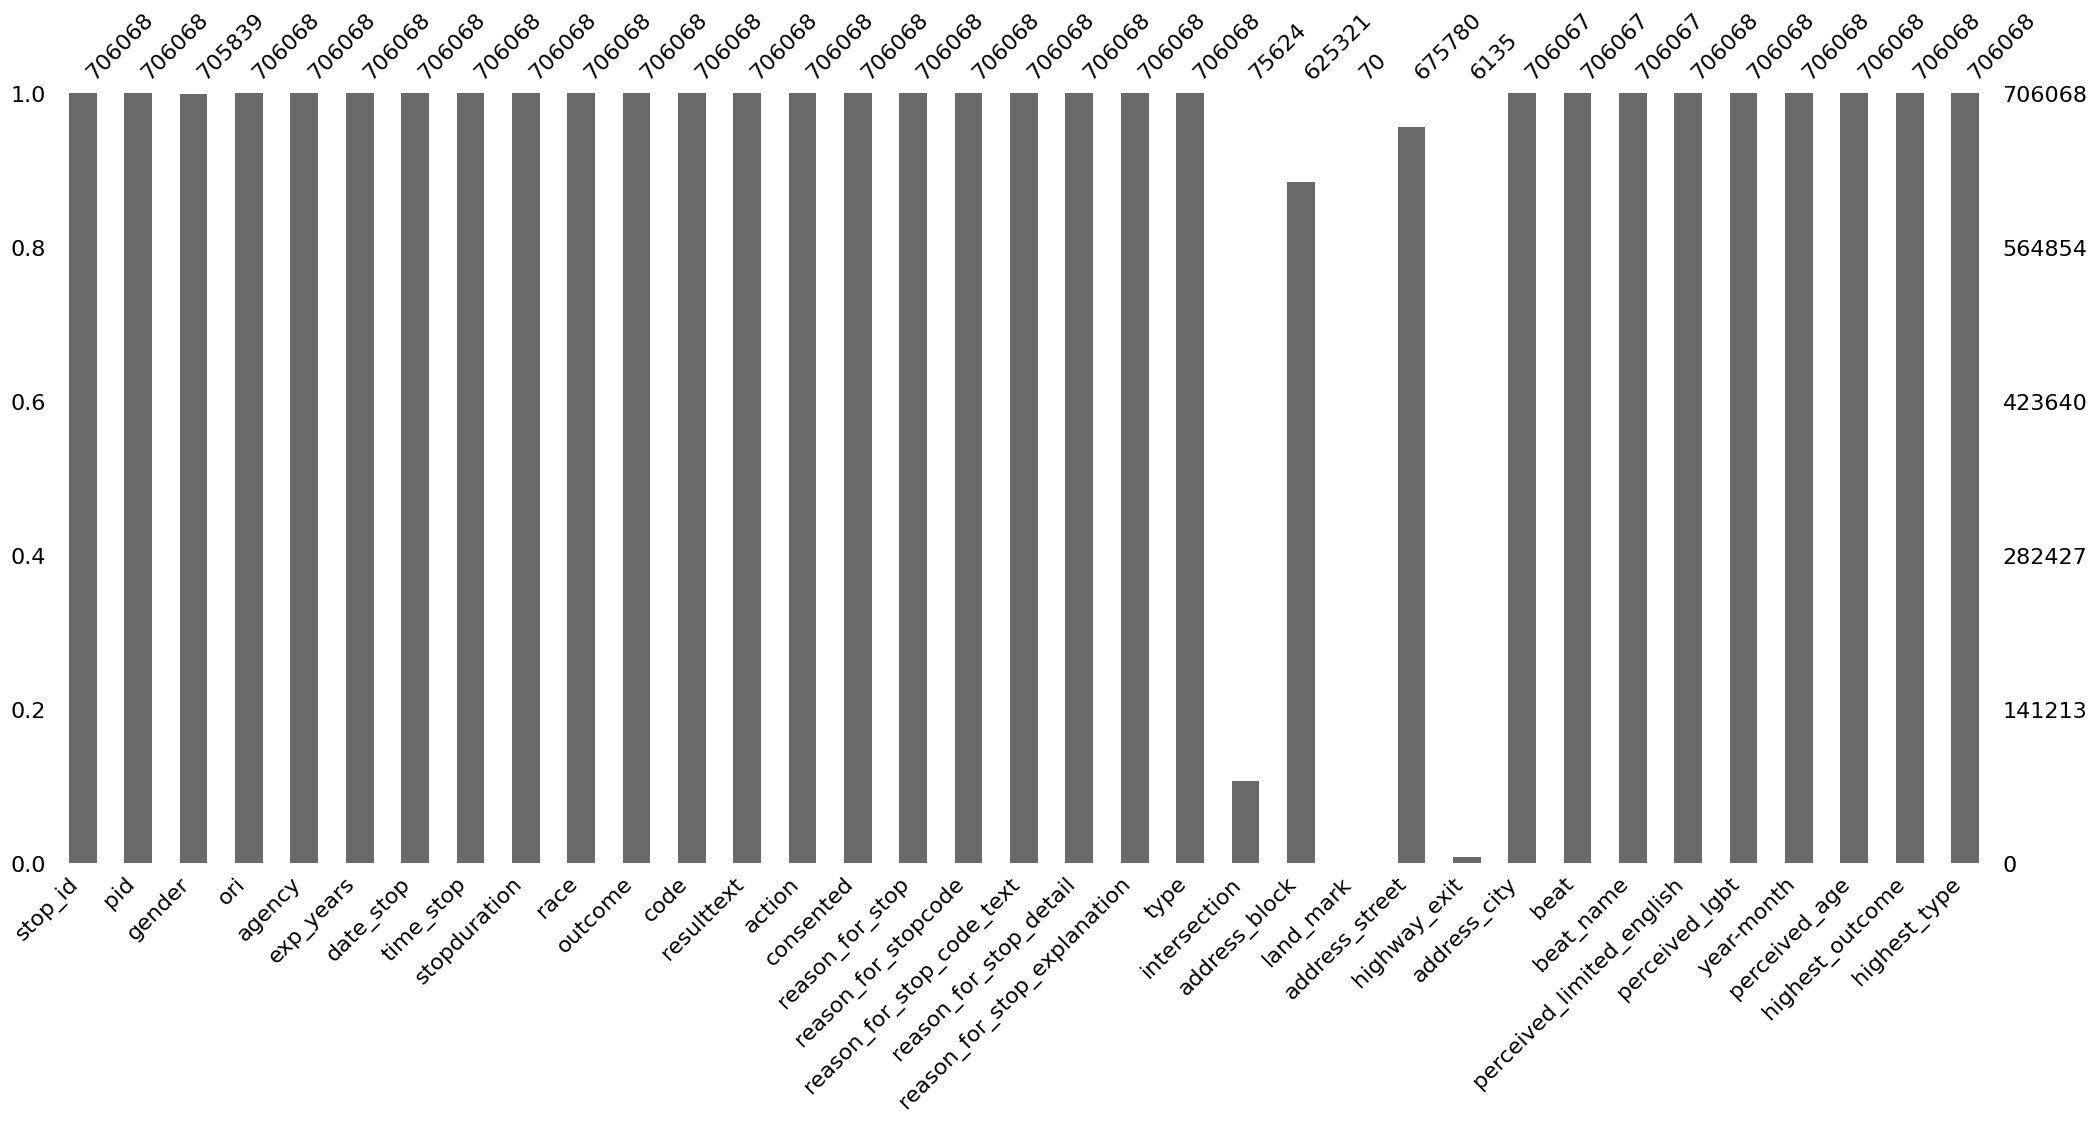

In [10]:
# missingno package allows for visualization of missing data within df
msno.bar(df)

By above, we see that there are 732,025 traffic stop cases in City of San Diego from July 1st, 2018 to September 30th, 2023. However, only 706,068 of them include the race information of the stopped person. There is no missing information in most columns, however, we notice that there are some address information element missing which might affect our following geospatial analysis on the potential homlessness stops.

### Automated Keyword Parsing System <a id='keyword'></a>

In this section, I am going to filter stops that are likely to be unhoused individuals by using keywords and most common code violations that are potentially homelessness-related in `resulttext`. We will first check the top common stop reason and result and then get the homeless-related keywords from the stop explanation. By using the keywords, I can extract the homelessness-related traffic stops.

- goal: finding out the racial distribution of stops that were (likely to be) carried out on an unhoused person 
  - step 1: filtering out stops that were likely to be unhoused individuals
    - create a new dataframe grouping by resulttext (penal code) to find 
    - most common code violations that are potentially homelessness-related

First, we need to check what is the most frequent penal code that cited in the reason to stop and the stop results.

In [11]:
# create a temporary dataframe to check the frequency of top 15 penal code in the stop reason
reason_15 = df.explode('reason_for_stop_code_text').groupby(['reason_for_stop_code_text'], as_index=False).size()
reason_15 = reason_15.sort_values(['size'], ascending=False).reset_index(drop=True).drop(1).reset_index(drop=True)
reason_15[:15]

,reason_for_stop_code_text,size
0,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,44398
1,22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,31955
2,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,29846
3,602 PC - TRESPASSING (M) 32022,28202
4,647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,26336
5,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000,21079
6,4000(A)(1) VC - NO REG:VEH/TRAILER/ETC (I) 54657,18920
7,21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,16467
8,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,16276
9,NA - XX ZZ - COMMUNITY CARETAKING (X) 99990,16189


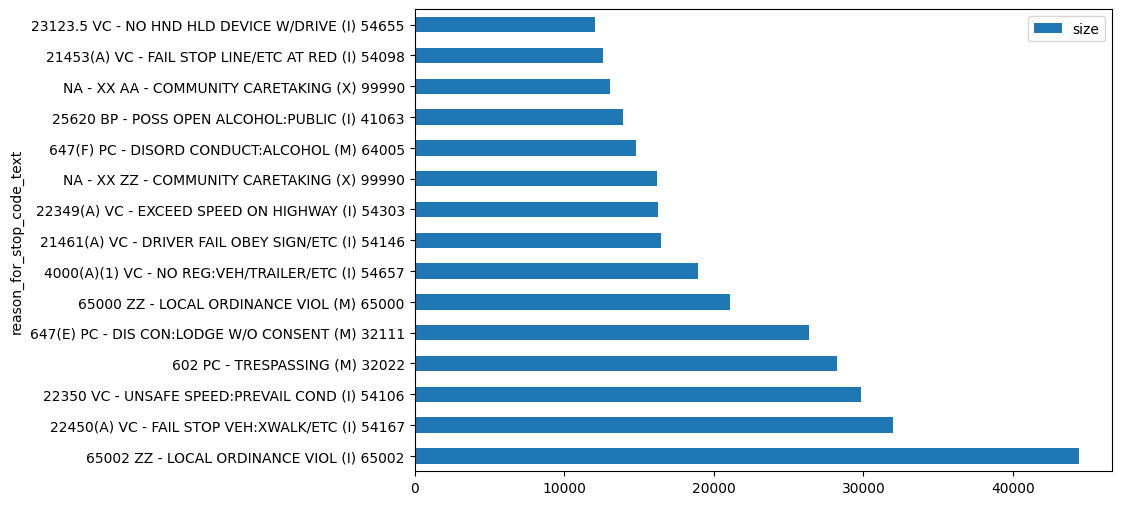

In [12]:
# sample plot of the 15 most common reason 
temp = reason_15.head(15)
temp.plot.barh(x="reason_for_stop_code_text", y=["size"])
plt.show()

In [13]:
# create a temporary dataframe to check the frequency of top 15 penal code in the stop result
resulttext_15 = df.explode('resulttext').groupby(['resulttext'], as_index=False).size()
resulttext_15 = resulttext_15.sort_values(['size'], ascending=False).reset_index(drop=True).drop(0).reset_index(drop=True)
resulttext_15[:15]

,resulttext,size
0,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,41579
1,22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,25985
2,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,22324
3,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,15554
4,21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,14889
5,4000(A)(1) VC - NO REG:VEH/TRAILER/ETC (I) 54657,12838
6,23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,10745
7,25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,10303
8,23123.5(A) VC - NO HND HLD DEVICE W/DRIVE (I) ...,9966
9,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098,9373


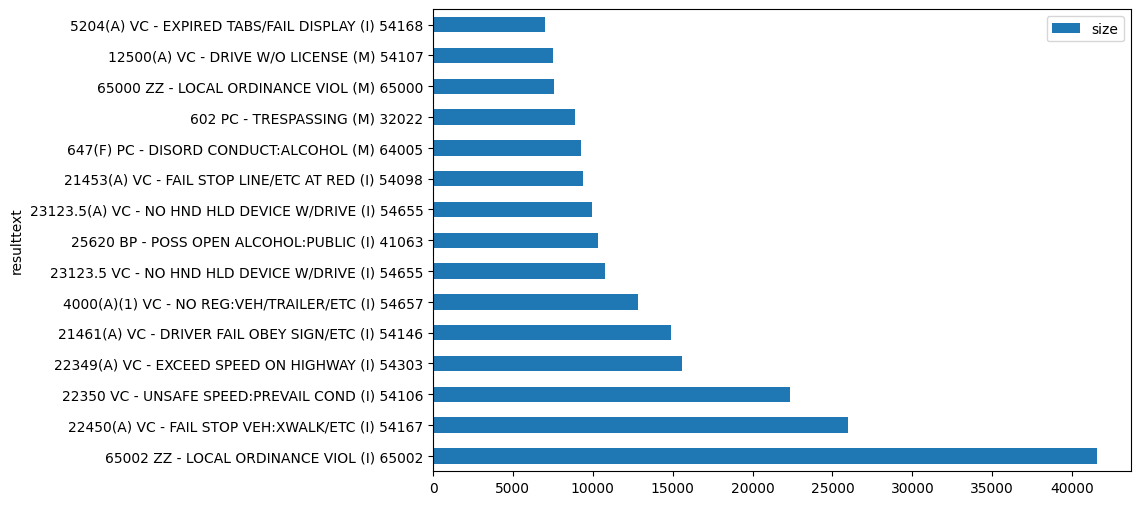

In [14]:
# sample plot of the 15 most common resulttexts 
temp = resulttext_15.head(15)
temp.plot.barh(x="resulttext", y=["size"])
plt.show()

According to Defense Attorney Coleen Cusack, there are 4 primary penal codes that are frequently used by officer involved with homelessness: 
- San Diego Municipal Code 86.0137(f)  Vehicle Habitation,
- San Diego Municipal Code 54.0110  Encroachment,
- San Diego Municipal Code 63.0102(b)(12)  Overnight Camping,
- Penal Code 647(e)  Illegal Lodging.

**Local violation** is the most frequent penal code exist in the reason to stop and stop results, however, police officer can include this penal code with various violations of local and city ordinances, such as noise violations, illegal burning, illegal camping, etc. **Trespassing** is the 4th most common stop reason and **Lodging without consent** is the 5th. It is possible to use some of the columns of the data and some human judgement to figure out whether a ticket for trespass is one against an unhoused person or not. On the other hand, **Trespassing** is the 12th most common stop outcome and **Lodging without consent** is the 16th.

In order to come up with a set of keywords that >90% of the time result in picking violations that seem likely to be given to unhoused people, we need to manually check the stop reason for the trespassing and illegal lodging violation result.

In [15]:
# trespassing
df.explode('code').query('code == 32022')[['reason_for_stop_explanation']].drop_duplicates().iloc[:20]

,reason_for_stop_explanation
131,[Radio call of transient in car port]
312,[A RADIO CALL OF DISTURBANCE]
313,[A RADIO CALL OF A DISTURBANCE]
315,[A RADIO CALL OF A DISTURBANCE WITH ALCOHOL]
600,[PED TRESSPASS FI]
601,[PED TRESPASS FI]
654,[Subject was sleeping in hallway]
696,[RADIO CALL]
752,[Person was detained pending and 602 PC invest...
987,"[PED TRESPASS ON PRIVAT PROPERTY, GOING THROUG..."


In [16]:
# illegal lodging
df.explode('code').query('code == 32111')[['reason_for_stop_explanation']].drop_duplicates().iloc[:20]

,reason_for_stop_explanation
149,[MALE SITTING ON CURB WITH MULTIPLE BAGS OF IT...
150,[MALE SLEEPING IN PUBLIC PARKING LOT..MULTIPLE...
174,[sleepin in car]
507,[REPORTING PARTY CALLED ABOUT A TRANSIENT HARA...
660,[sleeping on beach]
695,[observed subject illegally lodging on a publi...
1135,[SLEEPING ON BEACH]
1250,[Subject was sleeping in front of US Bank]
1834,[Subject was violating posted signs]
1835,[Violated posted signs.]


After scrolling through all the explanations, we now know some keywords and penal code that refer to unhoused people so that we can using these keywords to extract most of the homeless-related traffic stop from the RIPA data.

In [17]:
# create a new df filtering out only those rows which contain the homeless-related penal code or keywords

keywords =  '86.0137\(f\)|86.0137 \(f\)|86.0137 f|habitation|habitating|inhabit|habitaion|'
keywords = keywords + '647e|647\(e\)|647 e|647 \(e\)|lodg'
keywords = keywords + 'encroachment|54.0110|encroach|incroach|encroch|incroch|'
keywords = keywords + '63.0102\(b\)\(12\)|63.0102 b 12|63.0102b12|63.0102 \(b\) \(12\)|camp|encampment|transient|'
keywords = keywords + 'sleep|tent|property|transient|bags|homeless|unhoused'

these = df['reason_for_stop_explanation'].astype(str).str.lower().str.contains(keywords, regex=True, case=False, na=False)
homeless = df.loc[these]

print("homelessness-related stops:", homeless.shape[0])
print("percentage of homelessness-related stops:", homeless.shape[0] / df.shape[0])
print('Specifically,', '{} stops covering {} persons and {} charges'.format( 
          homeless.loc[these,'stop_id'].drop_duplicates().shape[0], 
          homeless.loc[these].shape[0],
          homeless.explode('resulttext')['resulttext'].value_counts().drop('[nan]').sum()
      ) 
)

homelessness-related stops: 72130
percentage of homelessness-related stops: 0.10215729929695157
Specifically, 53684 stops covering 72130 persons and 29749 charges


After the extraction, there are 72,130 total potentially related to homelessness charges involved with 53,684 stops and 72,130 persons, which is about **10.22%** of the entire traffic stop data. We note however that this homelessness data extraction is purely based on our keyword search which isn't comprehensive; there is a possibility that we may have missed some data in our analysis that are not captured by keyword searches. 

However, compared to VC 22450 (a) – Failure to Stop at a Stop Sign, which had 31,955 stops and is the largest single source that is not related to homelessness, the extracted homeless-related data still remains one of the largest sources of SDPD RIPA stops. This underscores our original intent to investigate from the starting point of homelessness, which examines whether there are racial disparities in enforcement under conditions where the data is abundant.

### Exploratory Data Analysis (EDA) <a id='eda'></a>

In this section, I will have a preliminary data analysis on homelessness-related stop in racial and action distribution in homless-related offenses.

To begin with, knowing the overall racial breakdown in the homeless-related stops can be useful to make a rough interpretation on the existence of racial disparity in the homeless enforcement.

In [18]:
# entire RIPA data racial breakdown
race_df = df.explode('race').groupby(['race'], as_index=False).size()
race_df['proportion'] = race_df['size'] / df.shape[0] * 100
race_df

,race,size,proportion
0,Asian,36183,5.124577
1,Black/African American,141221,20.001048
2,Hispanic/Latino/a,217749,30.839664
3,Middle Eastern or South Asian,21146,2.994896
4,Native American,1826,0.258615
5,Pacific Islander,6512,0.922291
6,White,290125,41.090235
7,"White, not Hispanic or Latino",285278,40.403757


In [19]:
# breaking down + graphing racial distribution of these select set of stops
homeless_race =  homeless.explode('race').groupby(['race'], as_index=False).size()
homeless_race['proportion'] = homeless_race['size'] / homeless.shape[0] * 100

# proportionally, African-Americans make up 24% of these results
homeless_race

,race,size,proportion
0,Asian,1476,2.046305
1,Black/African American,17899,24.814918
2,Hispanic/Latino/a,14727,20.417302
3,Middle Eastern or South Asian,601,0.833218
4,Native American,286,0.396506
5,Pacific Islander,491,0.680715
6,White,37202,51.576321
7,"White, not Hispanic or Latino",36862,51.104949


In [20]:
race_df['County Demographics (%)'] = [12.9, 5.6, 34.8, None, 1.4, 0.6, 74.6, 43.8]
race_df['County Homeless Population (%)'] = [2, 24, None, None, 3, 2, 66, None]
homeless_race = homeless_race.rename(columns={'proportion': 'Homelessness Stops Proportion (%)'})

race = pd.merge(homeless_race.drop(columns=['size']), race_df.drop(columns=['size']), on = ['race']).rename(columns={
    'proportion':'RIPA Stops Proportion(%)', 'race': 'Race'})

race

,Race,Homelessness Stops Proportion (%),RIPA Stops Proportion(%),County Demographics (%),County Homeless Population (%)
0,Asian,2.046305,5.124577,12.9,2.0
1,Black/African American,24.814918,20.001048,5.6,24.0
2,Hispanic/Latino/a,20.417302,30.839664,34.8,NaN
3,Middle Eastern or South Asian,0.833218,2.994896,NaN,NaN
4,Native American,0.396506,0.258615,1.4,3.0
5,Pacific Islander,0.680715,0.922291,0.6,2.0
6,White,51.576321,41.090235,74.6,66.0
7,"White, not Hispanic or Latino",51.104949,40.403757,43.8,NaN


<Axes: ylabel='race'>

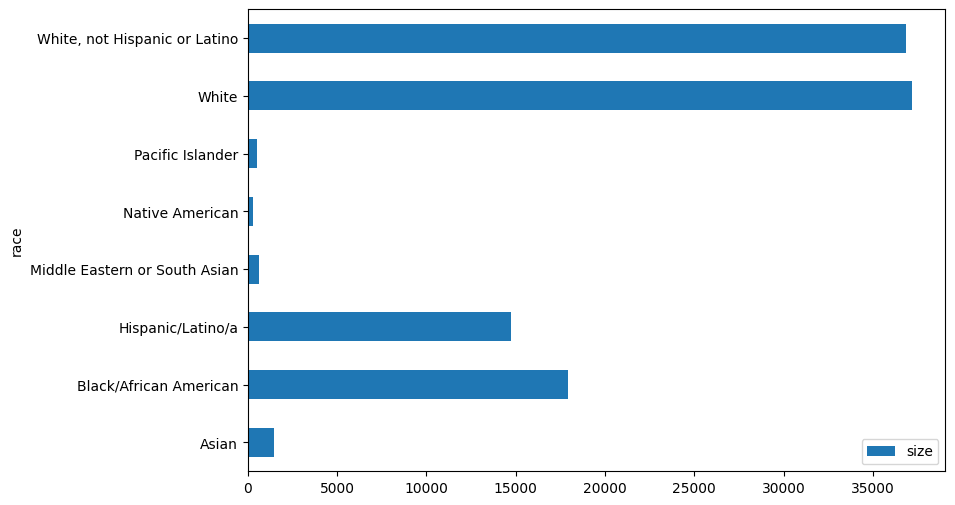

In [21]:
homeless_race.plot.barh(x="race", y=["size"])

The above chart and graph represent the racial distribution of the homelessness-related stops. We see that African Americans, who make up 6.1% of the total population in San Diego County, made up 24.8% of these results that match to the racial breakdown of the region’s unhoused population [[3](#ref3)]. The 51.6% Whites figure is less than the total San Diego County population 62% figure and unhoused population 66% figure. This leads us not to make a definite statement that there exists a racial disparity in traffic stop enforcement in homlessness.

In [22]:
homeless.explode('race').groupby('race')['stopduration'].mean()

race
Asian                            27.738482
Black/African American           24.333091
Hispanic/Latino/a                26.845454
Middle Eastern or South Asian    28.687188
Native American                  27.954545
Pacific Islander                 25.627291
White                            23.755389
White, not Hispanic or Latino    23.687402
Name: stopduration, dtype: float64

Furthermore, visualizing the distribution of homeless-related stops in month helps to figure out the time pattern of enforcement on the unhoused people.

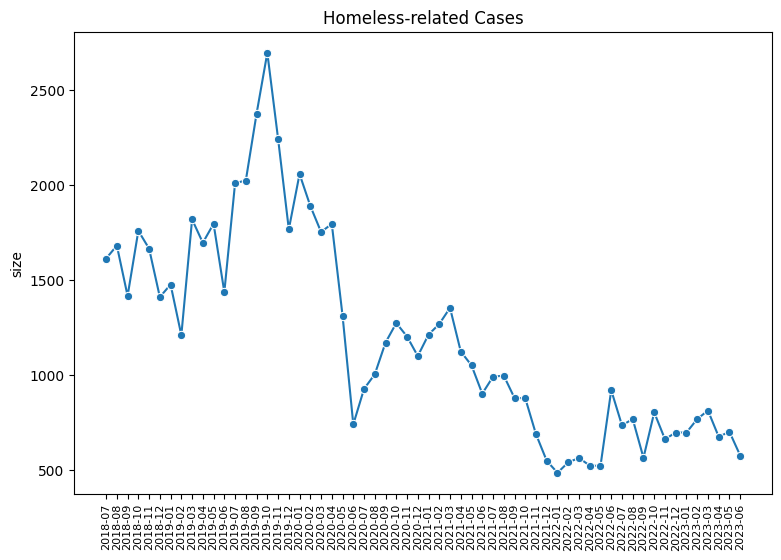

In [23]:
x = homeless.groupby(['year-month'], as_index=False).size()
g = sns.lineplot(x="year-month", y="size", marker='o', data=x)
g.set_xticklabels(sorted(homeless['year-month'].unique()), rotation=90, fontsize=8)
g.set_xlabel('');
g.set_title('Homeless-related Cases');

This graph shows the temporal changes in all homelessness-related charges. These kinds of graphs show the months along the bottom, and “how many stops” for that month on the vertical axis. We noticed that there exists peaks that are happened around May each year since July 2018. In addition, San Diego police have issued less tickets during the coronavirus pandemic, however, homelessness ticketing is strongly on the rise again this year.

#### Outcome Test

We are going to explore whether or not there exists a racial disparity in homeless-related stops by using the outcome test to see which violation expresses an unusual result.

We should seperately analyze stops with and without actions since stops without action are potential harrasment/policing predjudice.

In [24]:
act = homeless.copy()#.drop_duplicates(subset = ['stop_id', 'pid'])
act = act.query('highest_type != "No Action"')

noact = homeless.copy()#.drop_duplicates(subset = ['stop_id', 'pid'])
noact = noact.query('highest_type == "No Action"')

<Axes: xlabel='year-month'>

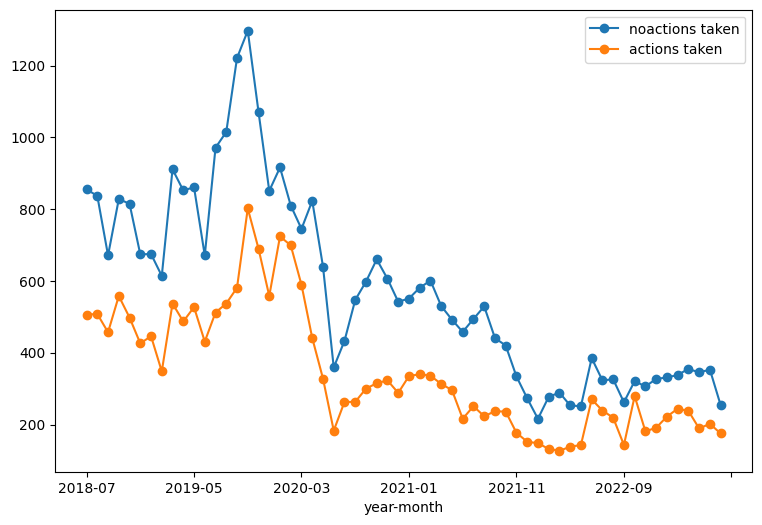

In [25]:
act_stops_month = act.groupby(['year-month','stop_id']).count().reset_index().groupby('year-month').count()['stop_id'].rename('actions taken')
noact_stops_month = noact.groupby(['year-month','stop_id']).count().reset_index().groupby('year-month').count()['stop_id'].rename('noactions taken')
noact_stops_month.to_frame().join(act_stops_month).plot(marker="o")

This above graph indicates the difference of homeless-related stops with and without actions in temporal changes. The stop result in no actions occurs more than in actions. Moreover, the shape of both distribution results looks similar.

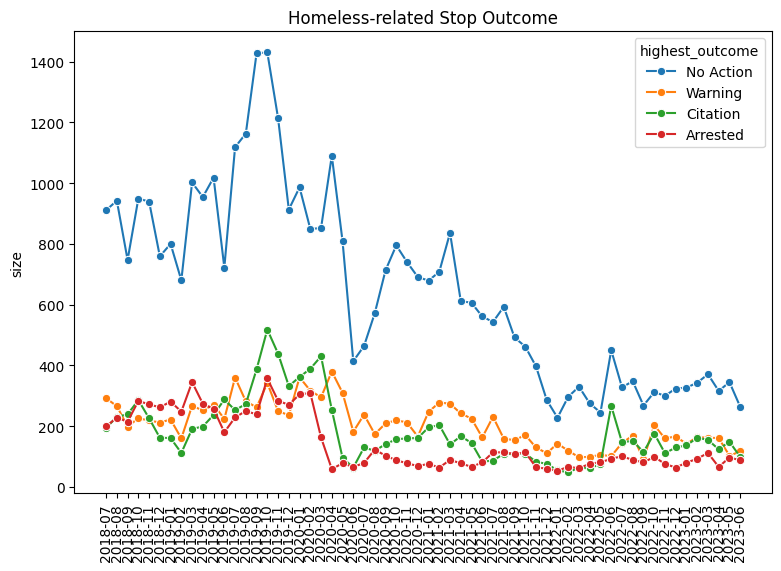

In [27]:
y = homeless.groupby(['year-month', 'highest_outcome'], as_index=False).size()
g = sns.lineplot(x="year-month", y="size", hue='highest_outcome', hue_order=['No Action','Warning','Citation','Arrested'],
                 marker='o', data=y)
g.set_xticklabels(sorted(homeless['year-month'].unique()), rotation=90)
g.set_xlabel('');
g.set_title('Homeless-related Stop Outcome');

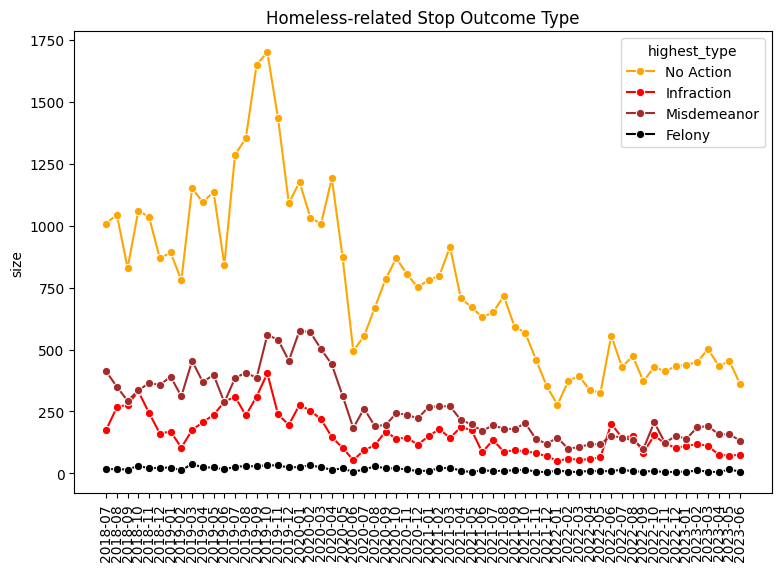

In [29]:
z = homeless.groupby(['year-month', 'highest_type'], as_index=False).size()
g = sns.lineplot(x="year-month", y="size", hue='highest_type', hue_order=['No Action','Infraction','Misdemeanor','Felony'],
                 palette=['orange', 'red', 'brown', 'black'],  marker='o', data=z)
g.set_xticklabels(sorted(homeless['year-month'].unique()), rotation=90)
g.set_xlabel('');
g.set_title('Homeless-related Stop Outcome Type');

**Homeless-related Offense**

In [32]:
cols1 = ['total', ('percent', 'Asian'), ('percent', 'Black/African American'), ('percent', 'Hispanic/Latino/a'), ('percent', 'White'), ('percent', 'White, not Hispanic or Latino')] 
cols2 = ['total', ('percent', 'No Action'), ('percent', 'Warning'), ('percent', 'Citation'), ('percent', 'Arrested')]
homeless_code = [32111,32022,65000,65002,99999,32103,32027,32102, np.nan, '[nan]']

In [30]:
def out_vs_homeless(black, num1, num2):
    ratio2 = num2 / (8427 * 0.66)
    if black == 1:
        ratio1 = num1 / (8427 * 0.24)
    else:
        ratio1 = num1 / (8427 * 0.31)
    return ratio1/ratio2

In [31]:
def out_vs_pop(black, num1, num2):
    ratio2 = num2 / (3276208 * 0.438)
    if black == 1:
        ratio1 = num1 / (3276208 * 0.056)
    else:
        ratio1 = num1 / (3276208 * 0.348)
    return ratio1/ratio2

In [85]:
( homeless.groupby('highest_outcome')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         homeless.explode("race").groupby(['highest_outcome','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
).drop( ['Referred to school', 'Parents Contacted']).reindex(["No Action", "Warning", "Citation", "Arrested"])[cols1]

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [34]:
x = homeless.explode("race").groupby(['race', 'highest_outcome'], as_index = False).size()
x = x[x['race'].str.contains('Black/African American|Hispanic/Latino/a|White,|As')][x['highest_outcome'].str.contains('Arrested|Citation|Warning')]
outcome_races = ['Black/African American', 'Hispanic/Latino/a', 'Asian']
outcome_res = ['Warning', 'Citation', 'Arrested']

for a in outcome_races:
    print("Outcome test using SD population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_pop(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    
    print("Outcome test using  population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_homeless(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')

Outcome test using SD population (Black/African American vs White):
as Warning,  0.5894292381199305
as Citation,  0.5997892952433252
as Arrested,  0.6214346781744902


Outcome test using  population (Black/African American vs White):
as Warning,  0.9970548491043278
as Citation,  1.0145795060501321
as Arrested,  1.0511939673229997


Outcome test using SD population (Hispanic/Latino/a vs White):
as Warning,  0.4646680035768522
as Citation,  0.44118173732936206
as Arrested,  0.5884460367218989


Outcome test using  population (Hispanic/Latino/a vs White):
as Warning,  0.7860137506372912
as Citation,  0.7462853250096323
as Arrested,  0.9953917050691247


Outcome test using SD population (Asian vs White):
as Warning,  0.05658675189028166
as Citation,  0.04662365026591777
as Arrested,  0.062113748320644875


Outcome test using  population (Asian vs White):
as Warning,  0.09571987902607079
as Citation,  0.078866696075092
as Arrested,  0.10506912442396316




The above charts shows racial proportion of potential unhoused perspon in the stop outcomes (stopped, arrested, cited, or warned). Given you are getting a warning and arrest, you are more likely to be White and less likely to be Latino.

****Vehicle Habitation****

In [35]:
# extract stops reason in vehicle habitation
habit_keywords = '86.0137\(f\)|86.0137 \(f\)|86.0137 f|habitation|habitating|inhabit|habitaion'
habit_these = df['reason_for_stop_explanation'].astype(str).str.lower().str.contains(habit_keywords, regex=True, case=False, na=False)
habit = df.loc[habit_these]

print('Specifically labelled vehicle habitation OR 86.0137(f):\n',
      '{} stops covering {} persons, which is {}% of the entire dataset'.format( 
          habit['stop_id'].unique().shape[0], 
          habit.shape[0],
          habit.shape[0] / df.shape[0] * 100) 
     )

Specifically labelled vehicle habitation OR 86.0137(f):
 1745 stops covering 2255 persons, which is 0.3193743378824702% of the entire dataset


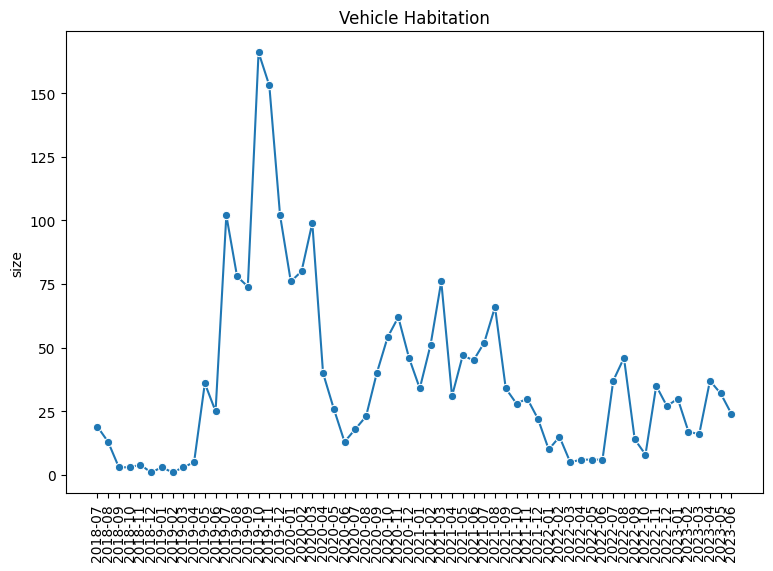

In [39]:
habit_g = habit.groupby(['year-month'], as_index=False).size()
g = sns.lineplot(x="year-month", y="size",# hue='type', hue_order=['no action','infraction','misdemeanor','felony'],
                 palette=['orange', 'red', 'brown', 'black'],  marker='o', data=habit_g)
g.set_xticklabels(sorted(habit['year-month'].unique()), rotation=90)
g.set_xlabel('');
g.set_title('Vehicle Habitation');

In [40]:
# check the racial distribution of habitation suspect
habit_race = habit.explode('race').groupby(['race'], as_index=False).size()
habit_race['proportion'] = habit_race['size'] / habit.shape[0] * 100
habit_race

,race,size,proportion
0,Asian,74,3.281596
1,Black/African American,348,15.432373
2,Hispanic/Latino/a,497,22.039911
3,Middle Eastern or South Asian,28,1.241685
4,Native American,5,0.221729
5,Pacific Islander,22,0.975610
6,White,1312,58.181818
7,"White, not Hispanic or Latino",1289,57.161863


In [41]:
habit_match1 = [any(item in row['resulttext'] for item in row['reason_for_stop_code_text']) for _, row in habit.iterrows()]
habit_match2 = [any(item in homeless_code for item in row['code']) for _, row in habit.iterrows()]

habit_match = pd.concat([habit[habit_match1], habit[habit_match2]], axis=0)
habit_match = pd.concat([habit_match, habit[habit['resulttext'] == '[nan]']])
habit_match = habit_match[~habit_match.index.duplicated(keep='first')]

print('Specifically resulted match labelled veichle habitation:\n',
      '{} stops covering {} persons which is {}% of the entire habitation table'.format( 
          habit_match['stop_id'].unique().shape[0], 
          habit_match.shape[0],
          habit_match.shape[0]/habit.shape[0] * 100) 
     )

Specifically resulted match labelled veichle habitation:
 1679 stops covering 2160 persons which is 95.78713968957871% of the entire habitation table


In [42]:
# check the racial distribution of habitation violation
habit_match_race = habit_match.explode("race").groupby(['race'], as_index=False).size()
habit_match_race['proportion'] = habit_match_race['size'] / habit_match.shape[0] * 100
habit_match_race

,race,size,proportion
0,Asian,71,3.287037
1,Black/African American,338,15.648148
2,Hispanic/Latino/a,475,21.990741
3,Middle Eastern or South Asian,28,1.296296
4,Native American,5,0.231481
5,Pacific Islander,22,1.018519
6,White,1251,57.916667
7,"White, not Hispanic or Latino",1229,56.898148


In [43]:
pd.merge(habit_race, habit_match_race, on = ['race']).drop(columns=['size_x', 'size_y']).rename(columns={'proportion_x' : 'proportion',
    'proportion_y':'proportion w/ matched result'})

,race,proportion,proportion w/ matched result
0,Asian,3.281596,3.287037
1,Black/African American,15.432373,15.648148
2,Hispanic/Latino/a,22.039911,21.990741
3,Middle Eastern or South Asian,1.241685,1.296296
4,Native American,0.221729,0.231481
5,Pacific Islander,0.975610,1.018519
6,White,58.181818,57.916667
7,"White, not Hispanic or Latino",57.161863,56.898148


In [61]:
( habit_match.groupby('highest_outcome')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         habit_match.explode("race").groupby(['highest_outcome','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x[:-1].sum()).astype(int) , axis=1)
     )
).reindex(["No Action", "Warning", "Citation", "Arrested"])[cols1]

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [45]:
x = habit_match.explode("race").groupby(['race', 'highest_outcome'], as_index = False).size()
x = x[x['race'].str.contains('Black/African American|Hispanic/Latino/a|White,|As')][x['highest_outcome'].str.contains('Arrested|Citation|Warning')]

In [46]:
outcome_races = ['Black/African American', 'Hispanic/Latino/a', 'Asian']
outcome_res = ['Warning', 'Citation', 'Arrested']
for a in outcome_races:
    print("Outcome test using SD population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_pop(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    
    print("Outcome test using  population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_homeless(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    

Outcome test using SD population (Black/African American vs White):
as Warning,  0.2852873563218391
as Citation,  0.3895730706075535
as Arrested,  0.3401677539608575


Outcome test using  population (Black/African American vs White):
as Warning,  0.4825806451612904
as Citation,  0.6589861751152074
as Arrested,  0.5754141238012206


Outcome test using SD population (Hispanic/Latino/a vs White):
as Warning,  0.3314367816091955
as Citation,  0.39956212370005484
as Arrested,  0.544268406337372


Outcome test using  population (Hispanic/Latino/a vs White):
as Warning,  0.5606451612903227
as Citation,  0.6758832565284179
as Arrested,  0.920662598081953


Outcome test using SD population (Asian vs White):
as Warning,  0.05034482758620691
as Citation,  0.08990147783251233
as Arrested,  0.17008387698042876


Outcome test using  population (Asian vs White):
as Warning,  0.08516129032258066
as Citation,  0.15207373271889402
as Arrested,  0.2877070619006103




***Illegal Lodging Stop Reason Outcome Test***

Let's specifically explore the distribution of the racial breakdown and temporal changes of illegal lodging and encroachment that cited in local violation and their penal code. We will start by looking at illegal lodging.

In [47]:
# extract local violations of illegal lodging
lodge_keywords = '647e|647\(e\)|647 e|647 \(e\)|lodg'
lodge_local = df['reason_for_stop_explanation'].astype(str).str.lower().str.contains(lodge_keywords, regex=True, case=False, na=False)

# extract tickets citied in illegal lodging penal code
lodge_code = df['reason_for_stop_code_text'].astype(str).str.contains('32111', na=False)
lodge = pd.concat([df.loc[lodge_local], df.loc[lodge_code]],ignore_index=True)
lodge = lodge[~lodge.index.duplicated(keep='first')]

print('Specifically labelled illegal lodging OR 647(e):\n',
      '{} stops covering {} persons which is {}% of the entire dataset'.format( 
          lodge['stop_id'].unique().shape[0], 
          lodge.shape[0],
          lodge.shape[0]/df.shape[0] * 100) 
     )

Specifically labelled illegal lodging OR 647(e):
 20016 stops covering 37774 persons which is 5.349909640431233% of the entire dataset


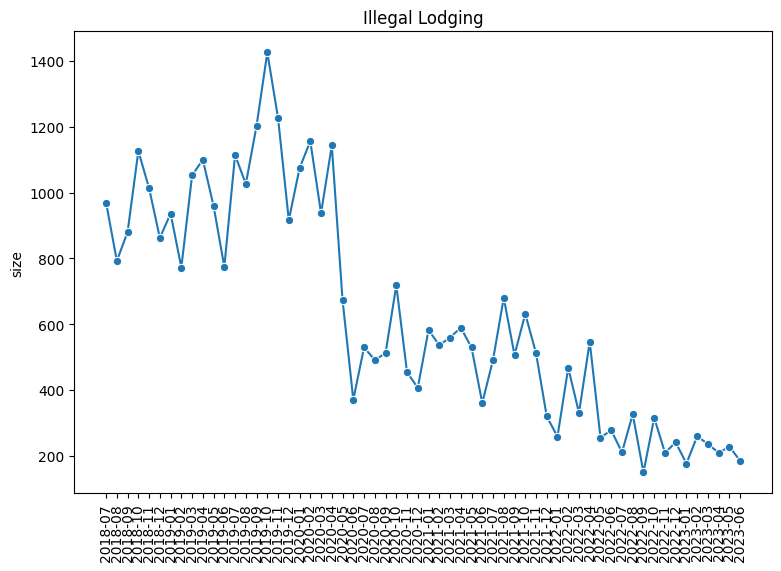

In [52]:
# graph the distribution of data citied in illegal lodging penal code
lodge_g = lodge.groupby(['year-month'], as_index=False).size()
g = sns.lineplot(x="year-month", y="size",# hue='type', hue_order=['no action','infraction','misdemeanor','felony'],
                 palette=['orange', 'red', 'brown', 'black'],  marker='o', data=lodge_g)
g.set_xticklabels(sorted(lodge['year-month'].unique()), rotation=90)
g.set_xlabel('');
g.set_title('Illegal Lodging');

By printing out the racial breakdown of illegal lodging offense, illegal lodging are less Hispanic and more Black and White than expected from city census of races, but similar to the city homelessness population.

In [53]:
# check the racial distribution of illegal lodging suspect
lodge_race = lodge.explode('race').groupby(['race'], as_index=False).size()
lodge_race['proportion'] = lodge_race['size'] / lodge.shape[0] * 100
lodge_race

,race,size,proportion
0,Asian,748,1.980198
1,Black/African American,9388,24.853074
2,Hispanic/Latino/a,7974,21.109758
3,Middle Eastern or South Asian,219,0.579764
4,Native American,166,0.439456
5,Pacific Islander,232,0.614179
6,White,19297,51.085403
7,"White, not Hispanic or Latino",19152,50.701541


In [54]:
lodge_match1 = [any(item in row['resulttext'] for item in row['reason_for_stop_code_text']) for _, row in lodge.iterrows()]
lodge_match2 = [any(item in homeless_code for item in row['code']) for _, row in lodge.iterrows()]

lodge_match = pd.concat([lodge[lodge_match1], lodge[lodge_match2]], axis=0)
lodge_match = pd.concat([lodge_match, lodge[lodge['resulttext'] == '[nan]']])
lodge_match = lodge_match[~lodge_match.index.duplicated(keep='first')]

print('Specifically resulted match labelled illegal lodging:\n',
      '{} stops covering {} persons which is {}% of the entire illegal lodging table'.format( 
          lodge_match['stop_id'].unique().shape[0], 
          lodge_match.shape[0],
          lodge_match.shape[0]/lodge.shape[0] * 100) 
     )

Specifically resulted match labelled illegal lodging:
 19284 stops covering 36381 persons which is 96.3122782866522% of the entire illegal lodging table


In [55]:
# check the racial distribution of illegal lodging violation
lodge_match_race = lodge_match.explode("race").groupby(['race'], as_index=False).size()
lodge_match_race['proportion'] = lodge_match_race['size'] / lodge_match.shape[0] * 100
lodge_match_race

,race,size,proportion
0,Asian,725,1.992798
1,Black/African American,9046,24.864627
2,Hispanic/Latino/a,7626,20.961491
3,Middle Eastern or South Asian,209,0.574476
4,Native American,158,0.434293
5,Pacific Islander,222,0.610209
6,White,18632,51.213546
7,"White, not Hispanic or Latino",18493,50.831478


In [ ]:
# check the racial distribution of illegal lodging violation
lodge_match_race = lodge_match.groupby(['race'], as_index=False).size()
lodge_match_race['proportion'] = lodge_match_race['size'] / lodge_match_race['size'].sum() * 100
lodge_match_race

In [56]:
pd.merge(lodge_race, lodge_match_race, on = ['race']).drop(columns=['size_x', 'size_y']).rename(columns={'proportion_x' : 'proportion',
    'proportion_y':'proportion w/ matched result'})

,race,proportion,proportion w/ matched result
0,Asian,1.980198,1.992798
1,Black/African American,24.853074,24.864627
2,Hispanic/Latino/a,21.109758,20.961491
3,Middle Eastern or South Asian,0.579764,0.574476
4,Native American,0.439456,0.434293
5,Pacific Islander,0.614179,0.610209
6,White,51.085403,51.213546
7,"White, not Hispanic or Latino",50.701541,50.831478


In [83]:
( lodge_match.groupby('highest_outcome')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         lodge_match.explode("race").groupby(['race','highest_outcome'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x[:-1].sum()).astype(int) , axis=1)
     )
).reindex(["No Action", "Warning", "Citation", "Arrested"])[cols1]

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [60]:
x = lodge_match.explode("race").groupby(['race', 'highest_outcome'], as_index = False).size()
x = x[x['race'].str.contains('Black/African American|Hispanic/Latino/a|White,|As')][x['highest_outcome'].str.contains('Arrested|Citation|Warning')]

for a in outcome_races:
    print("Outcome test using SD population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_pop(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    
    print("Outcome test using  population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_homeless(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    

Outcome test using SD population (Black/African American vs White):
as Warning,  0.5491859507911827
as Citation,  0.7495238284195073
as Arrested,  0.5261528059499663


Outcome test using  population (Black/African American vs White):
as Warning,  0.9289809189697957
as Citation,  1.2678644344630463
as Arrested,  0.8900189753320684


Outcome test using SD population (Hispanic/Latino/a vs White):
as Warning,  0.44702734839476815
as Citation,  0.544581564223642
as Arrested,  0.513319810682894


Outcome test using  population (Hispanic/Latino/a vs White):
as Warning,  0.756173526140156
as Citation,  0.9211923233973052
as Arrested,  0.8683111954459204


Outcome test using SD population (Asian vs White):
as Warning,  0.05541937254184579
as Citation,  0.0543133208999643
as Arrested,  0.04540906017579446


Outcome test using  population (Asian vs White):
as Warning,  0.09374518695986997
as Citation,  0.09187423438138018
as Arrested,  0.07681214421252373




****Encroachment****

Let's look at enroachment:

In [62]:
# extract local violations of enroachment
encroach_keywords = '54.0110|encroach|incroach|encroch|incroch'
encroach_local = df['reason_for_stop_explanation'].astype(str).str.lower().str.contains(encroach_keywords, regex=True, case=False, na=False)

# extract reason citied in encroachment penal code 
encroach_code = df['reason_for_stop_code_text'].astype(str).str.contains('66134', na=False)
encroach = pd.concat([df.loc[encroach_local], df.loc[encroach_code]],ignore_index=True)
encroach = encroach[~encroach.index.duplicated(keep='first')]

print('Specifically labelled encroachment:\n',
      '{} stops covering {} persons, which is {}% of the entire dataset'.format( 
          encroach['stop_id'].unique().shape[0], 
          encroach.shape[0],
          encroach.shape[0] / df.shape[0] * 100) 
     )

Specifically labelled encroachment:
 15645 stops covering 23544 persons, which is 3.3345230204456224% of the entire dataset


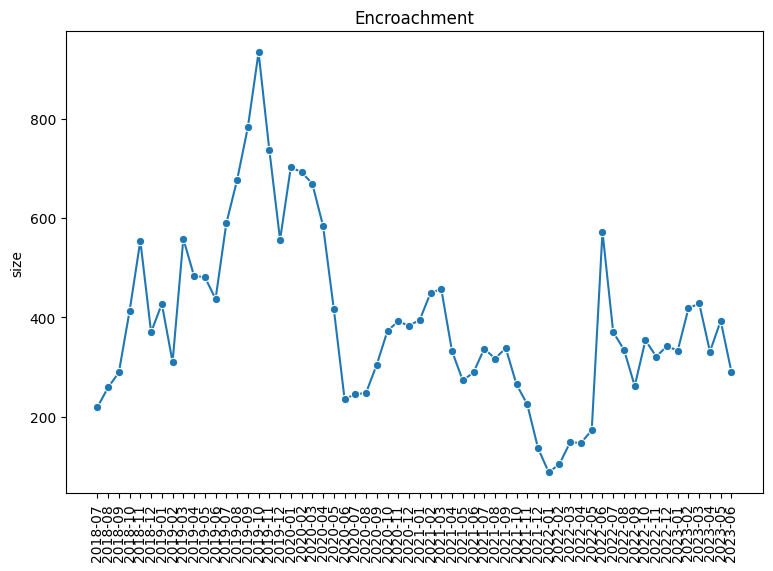

In [64]:
# graph the distribution of encroachment
encroach_g = encroach.groupby(['year-month'], as_index=False).size()
g = sns.lineplot(x="year-month", y="size",# hue='type', hue_order=['no action','infraction','misdemeanor','felony'],
                 palette=['orange', 'red', 'brown', 'black'],  marker='o', data=encroach_g)
g.set_xticklabels(sorted(encroach['year-month'].unique()), rotation=90)
g.set_xlabel('');
g.set_title('Encroachment');

In [65]:
# check the racial distribution of encroachment suspect
encroach_race = encroach.explode('race').groupby(['race'], as_index=False).size()
encroach_race['proportion'] = encroach_race['size'] / encroach.shape[0] * 100
encroach_race

,race,size,proportion
0,Asian,373,1.584268
1,Black/African American,6550,27.820251
2,Hispanic/Latino/a,4509,19.151376
3,Middle Eastern or South Asian,130,0.552158
4,Native American,90,0.382263
5,Pacific Islander,145,0.615868
6,White,11865,50.395005
7,"White, not Hispanic or Latino",11803,50.131668


In [66]:
encroach_match1 = [any(item in row['resulttext'] for item in row['reason_for_stop_code_text']) for _, row in encroach.iterrows()]
encroach_match2 = [any(item in homeless_code for item in row['code']) for _, row in encroach.iterrows()]

encroach_match = pd.concat([encroach[encroach_match1], encroach[encroach_match2]], axis=0)
encroach_match = pd.concat([encroach_match, encroach[encroach['resulttext'] == '[nan]']])
encroach_match = encroach_match[~encroach_match.index.duplicated(keep='first')]

print('Specifically resulted match labelled encroachment:\n',
      '{} stops covering {} persons which is {}% of the entire encroachment table'.format( 
          encroach_match['stop_id'].unique().shape[0], 
          encroach_match.shape[0],
          encroach_match.shape[0]/encroach.shape[0] * 100) 
     )

Specifically resulted match labelled encroachment:
 15122 stops covering 22726 persons which is 96.52565409446143% of the entire encroachment table


In [67]:
# check the racial distribution of encroachment violation
encroach_match_race = encroach_match.explode("race").groupby(['race'], as_index=False).size()
encroach_match_race['proportion'] = encroach_match_race['size'] / encroach_match.shape[0] * 100
encroach_match_race

,race,size,proportion
0,Asian,356,1.566488
1,Black/African American,6313,27.778756
2,Hispanic/Latino/a,4320,19.009065
3,Middle Eastern or South Asian,127,0.558831
4,Native American,87,0.382821
5,Pacific Islander,139,0.611634
6,White,11497,50.589633
7,"White, not Hispanic or Latino",11438,50.330018


In [68]:
pd.merge(encroach_race, encroach_match_race, on = ['race']).drop(columns=['size_x', 'size_y']).rename(columns={'proportion_x' : 'proportion',
    'proportion_y':'proportion w/ matched result'})

,race,proportion,proportion w/ matched result
0,Asian,1.584268,1.566488
1,Black/African American,27.820251,27.778756
2,Hispanic/Latino/a,19.151376,19.009065
3,Middle Eastern or South Asian,0.552158,0.558831
4,Native American,0.382263,0.382821
5,Pacific Islander,0.615868,0.611634
6,White,50.395005,50.589633
7,"White, not Hispanic or Latino",50.131668,50.330018


In [69]:
( encroach_match.groupby('highest_outcome')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         encroach_match.explode("race").groupby(['highest_outcome','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x[:-1].sum()).astype(int) , axis=1)
     )
).reindex(["No Action", "Warning", "Citation", "Arrested"])[cols1]

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

Things get a little interesting when we break things down into “what happened” in encroachment violations. Whites are a smaller proportion of arrests and a higher proportion of warning as African American and Hispanic are the opposite.

In [70]:
x = encroach_match.explode("race").groupby(['race', 'highest_outcome'], as_index = False).size()
x = x[x['race'].str.contains('Black/African American|Hispanic/Latino/a|White,|As')][x['highest_outcome'].str.contains('Arrested|Citation|Warning')]

for a in outcome_races:
    print("Outcome test using SD population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_pop(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    
    print("Outcome test using  population ({} vs White):".format(a))
    for b in outcome_res:
        print ("as {}, ".format(b), out_vs_homeless(a, x[(x['race'] == a) & (x['highest_outcome'] == b)]['size'].values[0], 
                                               x[(x['race'] == 'White, not Hispanic or Latino') & (x['highest_outcome'] == b)]['size'].values[0]))
    print('\n')
    

Outcome test using SD population (Black/African American vs White):
as Warning,  0.6531148384252201
as Citation,  0.6919383406210219
as Arrested,  0.8233589308129662


Outcome test using  population (Black/African American vs White):
as Warning,  1.104782855276952
as Citation,  1.1704551338476676
as Arrested,  1.392760931132141


Outcome test using SD population (Hispanic/Latino/a vs White):
as Warning,  0.4472562599893448
as Citation,  0.4580934853600488
as Arrested,  0.5754079598316475


Outcome test using  population (Hispanic/Latino/a vs White):
as Warning,  0.7565607438087547
as Citation,  0.7748925594159375
as Arrested,  0.9733370173378465


Outcome test using SD population (Asian vs White):
as Warning,  0.04492679073356237
as Citation,  0.04293048098743566
as Arrested,  0.05390238499593887


Outcome test using  population (Asian vs White):
as Warning,  0.07599635657449261
as Citation,  0.07261947910733704
as Arrested,  0.09117911169441184




### San Diego Municipal Code 63.0102(b)(12) Overnight Camping

In [ ]:
df[df['resulttext'].str.contains('62120', na=False)]['resulttext'].unique()

When we look at the racial breakdown of these different offenses you will see that there’s some noticeable differences in racial composition for stops that are probably homelessness related and all stops or a very common traffic stop like speeding.

In [ ]:
lodge[lodge.resulttext.str.lower().str.contains('tres', na = False)]['resulttext'].unique()

In [ ]:
lodging = ( lodge.drop_duplicates(subset=['pid','stop_id']).groupby('race')['stop_id'].count() 
    / lodge.drop_duplicates(subset=['pid','stop_id'])['stop_id'].count() 
    * 100 ).rename('illegal lodging (%)').to_frame()
trespass = ( df[df.code.isin([32022, 32100,32102,32131])].groupby('race')['stop_id'].count() 
    / df[df.code.isin([32022, 32100,32102,32131])]['stop_id'].count() 
    * 100 ).rename('trespass (%)').to_frame()
enroachment = ( encroach.drop_duplicates(subset=['pid','stop_id']).groupby('race')['stop_id'].count() 
    / encroach.drop_duplicates(subset=['pid','stop_id'])['stop_id'].count() 
    * 100 ).rename('encroachment (%)').to_frame()
habitation = ( habit.drop_duplicates(subset=['pid','stop_id']).groupby('race')['stop_id'].count() 
    / habit.drop_duplicates(subset=['pid','stop_id'])['stop_id'].count() 
    * 100 ).rename('habitation (%)').to_frame()
speeding = ( df.query('code == 54106').drop_duplicates(subset=['pid','stop_id']).groupby('race')['stop_id'].count() 
    / df.query('code == 54106').drop_duplicates(subset=['pid','stop_id'])['stop_id'].count() 
    * 100 ).rename('speeding (%)').to_frame()
allstops =  ( df.drop_duplicates(subset=['pid','stop_id']).groupby('race')['stop_id'].count() 
    / df.drop_duplicates(subset=['pid','stop_id'])['stop_id'].count() 
    * 100 ).rename('all stops (%)').to_frame()

In [ ]:
allstops.join(speeding).join(trespass).join(lodging).join(enroachment).join(habitation)

In comparison, according to city census San Diego county population is about 6% Black, 17% Asian, 30% Hispanic, 42% White. According to county of San Diego 2022 Point-in-Time data, there is about 24% Black, 2% Asian, 66% White in homelessness population.

There’s a substantial overrepresentation of Blacks in all stops and in homelessness related stops compared to the census data and homelessness racial data. However, it is notable that the overrepresentation goes away for speeding offenses.

There is fewer Hispanics and Asians in homelessness related stops. Asians are notably low in every kind of stop, Hispancics are about where we’d expect them given population in all stops and speeding violations.

Interestingly, there is more Whites in homelessness related stops and fewer in speeding.

### GeoSpatial Analysis <a id='geo'></a>

In this section, we will have a geospatial analysis on the homelessness-related traffic stops. We are going to create a geographic distribution on the homelessness-related traffic stops and see how it relates to the city bus stops and stations and area frequented by PEH (persons experiencing homelessness). 

We will first convert the address of homelessness-related stop data into coordinates and graph them in the map using folium api. Then we will load the area frequented by PEH data and city stops and stations data and add them as additional layer in the map.

According to Defense Attorney Coleen Cusack, there are 8 primary area frequented by PEH: 
 - 2500 - 2700 Sports Arena Blvd,
 - East Village spread over several blocks - 16th and 17th street, Imperial avenue, Market street, G street.
 
**Note**: Bus stops and stations of San Diego City in San Diego County can be found and downloaded in [here](https://mygeodata.cloud/data/download/osm/bus-stops-and-stations/united-states-of-america--california/san-diego-county/san-diego)

**Data Preparation**

We first check the missing address data in order to get the sense of how many homelessness-related stop we are going to miss in the geospatial analysis.

In [ ]:
# duplicate result_df dataframe
addr_df = homeless.copy()
addr_ele = ['intersection','address_block', 'land_mark', 'address_street', 'address_city']
addr_df[addr_ele] = addr_df[addr_ele].replace('', np.nan)


# check the percentage of missing address data
print("The percentage of missing data in each address element are")
print(addr_df[addr_ele].isna().sum() / homeless.shape[0] * 100)

In [ ]:
print("The perecent of missing both address_block and intersection is",
      (1 - addr_df[['address_block','intersection']].dropna(how = 'all').shape[0] / addr_df.shape[0]) * 100)
print("The perecent of missing both address_block and land_mark is",
      (1 - addr_df[['address_block','land_mark']].dropna(how = 'all').shape[0] / addr_df.shape[0]) * 100)

Then, we construct a new column that contains the full address of the homeless-related stops.

In [ ]:
# construct a column of the full address of stops
addr_df = addr_df.dropna(subset = addr_ele[:-1], how = 'all')
addr_df['address_block'] = addr_df['address_block'].astype('Int64').astype(str).replace('<NA>', '')
addr_df['full_address'] = addr_df[addr_ele[:-1]].apply(lambda x: x.str.cat(sep=' '), axis=1)

# add state and country in full address to enforce the coordinates conversion
addr_df['full_address'] = addr_df['full_address'].apply(lambda x: x + ", San Diego, California, United States" if x != '' else '')

Using geopy.geocoders api, we convert the full address into coordinates.

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(timeout=10, user_agent = 'myGeolocator')#"myGeocoder")

In [ ]:
addr_df['geocodes'] = addr_df['full_address'].apply(geolocator.geocode, country_codes='usa')

# separate the latitude and longitude from geocode 
addr_df['lat'] = addr_df['geocodes'].apply(lambda x: x.latitude if x else None)
addr_df['lon'] = addr_df['geocodes'].apply(lambda x: x.longitude if x else None)

addr_df.drop(columns='datetime_stop').to_csv('osm_df.csv')

In [ ]:
addr_df = pd.read_csv('osm_df.csv').drop(['Unnamed: 0'], axis = 1)

After conversion, we check how many stop is fail to convert into coordinates in addition to remove the stops that have incorrect coordinate (stop locations that detected by geopy api result in city is not in San Diego county).

In [ ]:
# check the number of fail coordinates convertion
geo_df = addr_df.dropna(subset = ['lon', 'lat'])
print("The percent of fail to convert is:", (1 - geo_df.shape[0] / homeless.shape[0]) * 100,
     "% which are", homeless.shape[0] - geo_df.shape[0], "stops")

**Fixing Coordinates Errors**

To filter the coordinates inside San Diego boundaries we need to get these boundaries from the San Diego census tract geojson file which can be found at this [link](https://sdgis-sandag.opendata.arcgis.com/datasets/SANDAG::census-tracts/about).

In [ ]:
# creating a geodataframe from San Diego census tract geojson
import geopandas as gpd

sd = gpd.read_file("Census_ZIP.geojson")
sd.plot()

In [ ]:
sd

In [ ]:
# create a geodataframe for the homeless-related stops
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(geo_df,
                       crs = sd.crs,
                       geometry = [Point(xy) for xy in zip(geo_df.lon, geo_df.lat)])

In [ ]:
# separate the geodataframe by spatial relationship
difference = gpd.overlay(gdf, sd, how = "symmetric_difference")
intersection = gpd.overlay(gdf, sd, how = "intersection")

# found 1 coordinates errors
len(difference)

In [ ]:
difference

In [ ]:
# check how much data we have for geospatial analysis 
print("The percent of homeless-related data we lose in the coordinate conversion:", 
      (1 - intersection.shape[0] / homeless.shape[0]) * 100)
print("which is ", homeless.shape[0] - intersection.shape[0], "stops")
print("We have", intersection.shape[0], "homeless_related stops for the following geospatial analysis")

There are 15180 stops we lost from coordinates conversion including 15179 stops fail to convert and 1 stop with incorrect coordinates. While we keeping updating our keyword parsing system to have more accurate homelessness-related stops, it is time-consuming to run the coordinate conversion. We are considering using Google Geocoding API for a faster and more accurate conversion.


Import the encampment locations provided by defense attorney Coleen Cusack and bus stops and stations coordinates so that we can later visualize them in order to see the geographic relation between homless-related stops and them. 

In [ ]:
# get the gelocation of some big homeless encampment in San Diego
encamp = ["2500 Sports Arena Blvd, San Diego", 
          "2600 Sports Arena Blvd, San Diego", 
          "2700 Sports Arena Blvd, San Diego",
          "16th street, San Diego", 
          "299 17th street, San Diego", 
          "Imperial avenue, San Diego",
          "Market street, San Diego", 
          "G street, San Diego"]

encamp_lon = []
encamp_lat = []
for x in encamp:
    encamp_lat.append(geolocator.geocode(x).latitude)
    encamp_lon.append(geolocator.geocode(x).longitude)

encamp_df = pd.DataFrame({'address': encamp, 'lon':encamp_lon, 'lat':encamp_lat})

In [ ]:
# import the San Diego bus stops and stations data
bus_stops = pd.read_csv('bus_stop_point.csv')
bus_stops.head()

#### Folium

Using folium api, we are able to create a geographic distribution of homelessness-related stop in to a map.

In [ ]:
import folium
from folium.plugins import HeatMap
from folium.plugins import BeautifyIcon

The following map is the general scatter geographic plot of how the homeless-related stop spread out.

In [ ]:
# cluster 
cluster = folium.Map(location=[32.8801,-117.2340], zoom_start=10)

for i,r in intersection.iterrows():
    folium.CircleMarker([r['lat'], r['lon']],
                        #Make color/style changes here
                        radius = 1,
                        color = 'blue'
          ).add_to(cluster)
cluster

**HeatMap Plugin**

A heat map is a data visualization technique that represents the magnitude of a phenomenon in color on two dimensions. The change in color can be a change in intensity, providing readers with obvious visual clues as to how the phenomenon aggregates or changes in space. I will use the HeatMap plugin to demonstrate how the overall homelessness-related traffic stops in San Diego are geographically distributed and where there are strong clusters.

In [ ]:
# heat map
hm = folium.Map(location=[32.8801,-117.2340], zoom_start=10)

# add bus stops/stations
for i,r in bus_stops.iterrows():
    folium.CircleMarker([r['Y'], r['X']],
                        #Make color/style changes here
                        radius = 1,
                        color = 'pink',
                        opacity = 0.6
          ).add_to(hm)
    
HeatMap(
    list(zip(intersection.lat.values, intersection.lon.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
).add_to(hm)

for i in range(0,len(encamp_df)):
    folium.Marker([encamp_df['lat'][i], encamp_df['lon'][i]],
                       radius = 4,
                       color = "purple").add_to(hm)

hm

The pink dots are the bus stops and station in San Diego, and the purple dots are the areas that frequented by PEH. From the heat map we can tell that a large portion of the homeless-related stops occurred in the East Village area of San Diego, particularly in 16th and 17th Street, catering to the large homeless encampment mentioned by defense attorney Coleen Cusack. In addition to this, the distribution of stops appears to converge on the distribution of bus stops in San Diego. However, we could not yet determine the strength of their relationship until a model test is done. In the future, I will use the poisson point process to create a model to calculate how the geographic distribution of homeless-related stops is associated with bus stops or with the population size of the area.

**Create Time Lapse Heat Map by HeatMapWithTime Plugin**

Basically, HeatMapWithTime is an extension of HeatMap, but we display the data on heat map over time. It can also create an animation of the heat map that we can pause, play, loop, and also play at different speeds.

In [ ]:
from folium.plugins import HeatMapWithTime
import branca.colormap
from collections import defaultdict
import webbrowser

The time index can be specified with addition to the number of stops throughout a month, allowing a more meaningful representation of what the time steps mean.

In [ ]:
month_index = []
for x in geo_df['year-month'].sort_values().unique():
    month_index.append(str(x) + " (" + str(len(geo_df.loc[geo_df['year-month'] == x])) + ")")

In order to control intensity shown on the map, each data entry needs to have a weight which should be between 0 and 1. 

In [ ]:
intersection['conta'] = 1
weighted_list = []

for x in intersection['year-month'].sort_values().unique():
    weighted_list.append(intersection.loc[intersection['year-month'] == x,
                               ['lat', 'lon', 'conta']].groupby(['lat', 'lon'])
                         .sum().reset_index().values.tolist())


In [ ]:
color = branca.colormap.linear.Spectral_04.colors
color.reverse()

In [ ]:
# base map
hmt = folium.Map(location=[32.8801,-117.2340], zoom_start=10)

# add legend bar
steps = 10
colormap = branca.colormap.LinearColormap(colors=color).scale(0, 1).to_step(steps)
gradient_map = {}
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(hmt) #add color bar at the top of the map  

# add bus stops/stations
for i,r in bus_stops.iterrows():
    folium.CircleMarker([r['Y'], r['X']],
                        #Make color/style changes here
                        radius = 1,
                        color = 'gray',
                        opacity = 0.3
          ).add_to(hmt)
    
# add plugin to map
HeatMapWithTime(
    weighted_list,
    index = month_index,
    radius = 10,
    gradient = gradient_map,
    min_opacity = 0.5,
    max_opacity = 0.9,
    use_local_extrema = True,
    auto_play = True
).add_to(hmt)

# add area frequented by PEH marker
for i in range(0,len(encamp_df)):
    folium.CircleMarker([encamp_df['lat'][i], encamp_df['lon'][i]],
                       radius = 4,
                       color = "purple"
                       ).add_to(hmt)
    
hmt.save("heatmapwtime.html")
hmt

Geospatial visualization is a powerful method of storytelling, especially with heat maps. I use HeatMapWithTime to use coordinates and time to convey intercept location changes. The gray dots are the bus stops and station in San Diego, and the purple markers are the areas that frequented by PEH. The intersection area of Imperial Avenue and 16th\17th Street is the most crowded area followed by Sports Arena Boulevard. Furthermore, the number of stops decreases after the start of the coronavirus pandemic, but the homeless-related stops converge more on the city bus route.

Route time and distance

In [ ]:
# calculate the distance and time of the route to each encampment

In [ ]:
from route import *

route = intersection
for i, r in encamp_df.iterrows():
    route = commute_time(route, str(i), zip(r['lon'], r['lat']), 'foot-walking')

In [ ]:
route

## Preliminary CDCR Data Breakdowns and Analysis <a id =cdcr></a>

CDCR stands for California Department of Corrections and Rehabilitation that manages the State of California's prison system. We sent a Public Record Act (PRA) requests in summer 2022 that asked for a list of all felon inmates in a CDCR institution (exclude offenders under the age of 18 and those who CDCR have determined pose a danger to themselves or CDCR) between 1 July 2012 and 1 July 2022. The list contains the following data elements:
- Latest CDCR Number
- Current Age 
- Race (as of the file date)
- Ethnicity (as of the file date)
- County of Last Legal Residence (at time of release)
- Controlling Offense
- Name of Sentencing Judge
- Sentence (aggregate sentence in months)
- Date CDCR commitment began (admission/return date)
- Release Date (for inmates still in custody, this field is blank)

In this section, we are going to have a very preliminary data analysis on the CDCR data since we receive this data very recently. 

**Note**: CDCR PRA request and data can be found through [Public Records Archive](https://californiacdcr.govqa.us/WEBAPP/_rs/(S(fs4bbcmqt1oxrxmpyuimr4zu))/openrecordssummary.aspx?view=1&sSessionID=10713234206NQYLMAIHWDKKWISNSBBRKSLDGJMJT) with the reference number `C006029-071222`.


In [ ]:
cdcr = pd.read_excel('C006029-071222.xlsx')
cdcr.head()

In [ ]:
# check the percentage of missing data
print("The percentage of missing information in the CDCR data are")
print(cdcr.isna().sum() / cdcr.shape[0] * 100)

In [ ]:
# missingno package allows for visualization of missing data within cdcr data
msno.bar(cdcr)

There are total 402339 cases been recorded by CDCR within the past 10 years. Approximately 19% of the overall data are missing release date, which may be because some inmates are still serving their sentences. Moreover, about 0.75% of the entire data is missing the judge's name, which may slightly lead to future implications for the CDCR sentencing analysis in San Diego County because I will use the judge's name as a cross-reference to find the sentencing location of each CDCR inmate.

In [ ]:
cdcr.describe()

In [ ]:
# check the top sentence group by race
cdcr_sentence = cdcr.groupby(['Sentence (in months)', 'Race'], as_index = False).size().sort_values(['Sentence (in months)'])
cdcr_sentence[:17]

From the above charts, the average sentence duration for the felon inmates who are provided from CDCR is $1638.33$ months ($\thicksim 136$ years) with the average current age of 41. It is noticable that the maximum of sentence duration is $1000000$ months($\thicksim 83333$ years). According to "What’s the Point of Sentencing Anyone to 141,000 Years in Prison?" by Eric Grundhauser, the reason for sentencing a person to hundreds or even thousands of years of imprisonment in the United States is the admission of multiple crimes committed by the same person and each count represents a victim [[4](#ref4)]. However, it is exploration-worthy that why some felon inmates received a **zero** day of sentence? In addition, the number of Blacks and Hispanic of receving 0 day sentence is higher than Whites.

**Time Trends with CDCR Commitment Date**

The below historgram shows the temporal changes of the amount of CDCR cases based on their commitment beginning date. However, there are some expected cases before 2012 which is not in the time range we asked for.

In [ ]:
sns.histplot(data=cdcr, x='Date CDCR commitment began', kde=True)

In [ ]:
cdcr['Date CDCR commitment began'].min()

Take a look on the overall racial breakdown:

In [ ]:
# racial breakdown of the cdcr sentence data
cdcr_race =  cdcr.groupby(['Race'], as_index=False).size()
cdcr_race['proportion'] = cdcr_race['size'] / cdcr_race['size'].sum() * 100
cdcr_race

California census data show that Whites alone account for 61.6%; Blacks only 12.4%; Latinos 18.7%; and Asians only 6%. There is substantial overrepresentation of Blacks and Hispanics compared to the state census data. The proportion of Asians and Whites are noticable low in the sentence data. 

 We want to group the cases by sentencing over 1 year, 10 years, and 100 years in order to look for any racial distribution difference in different sentence time.

In [ ]:
sentence_1yr = cdcr[cdcr['Sentence (in months)'] >= 12].groupby(['Race'], as_index=False).size()
sentence_1yr['proportion'] = sentence_1yr['size'] / sentence_1yr['size'].sum() * 100
sentence_1yr

In [ ]:
sentence_10yrs = cdcr[cdcr['Sentence (in months)'] >= 120].groupby(['Race'], as_index=False).size()
sentence_10yrs['proportion'] = sentence_10yrs['size'] / sentence_10yrs['size'].sum() * 100
sentence_10yrs

In [ ]:
sentence_100yrs = cdcr[cdcr['Sentence (in months)'] >= 1200].groupby(['Race'], as_index=False).size()
sentence_100yrs['proportion'] = sentence_100yrs['size'] / sentence_100yrs['size'].sum() * 100
sentence_100yrs

Interestingly, the percentage of Blacks significantly increases as the sentence duration increases. On the other hand, the percentage of Hispanics and Whites decrease as the sentence duration increases.

**The Composition of CDCR Offenses**

In [ ]:
common_crime = cdcr.groupby('Controlling Offense', as_index=False).size().sort_values(['size'], ascending=False)
common_crime['proportion'] = common_crime['size'] / common_crime['size'].sum() * 100
common_crime.cumsum().iloc[:37]

From above, top 37 crimes takes proportion of the 80% of the entire data. Thus, we will pick some specific crime to test their racial composition comparing to the corresponding crime in RIPA data. We want to see whether or not these crimes are racially disproportionate than expected.

# Racial differences 
- crimes that might be inappropriate / difference racial compositions than expected
    - compare to that crime's RIPA data (this is best)
    - compare to general population of all prisoners (this is better)
    - compare to CA population (this is weak)
- top 37 crimes takes proportion of the 80% of the entire data
- get RIPA data to compare across all of CA, or if not avail then get top metro areas and combine


In [ ]:
## Find out the sentence region by cross-referencing the judge name on the judge duty location

In [ ]:
former = pd.read_csv('Former judges.csv', header = 1).drop(columns = "State")
born_died = former['Born–died'].str.split('–',n = 1, expand = True)
former['Born'] = born_died[0]
former['Died'] = born_died[1]
former = former.drop(columns='Born–died')
current = pd.read_csv("Current judges.csv", header = 1).drop(columns = ['Title', 'Duty station'])
current = current.rename(columns={'Active':'Active service','Chief':'Chief Judge','Senior':'Senior status'})
superior = pd.read_csv('superior court judges.csv').rename(columns = {'Tenure': 'Active service', 'Appointed By': 'Appointed by'})
sd_judge = pd.concat([former,current,superior])
sd_judge

In [ ]:
from nameparser import HumanName

In [ ]:
cdcr_judge = []
null_list = cdcr[cdcr['Judge\'s Name'].isnull()].index.tolist()
for i in range(len(cdcr['Judge\'s Name'])):
    if i in null_list:
        cdcr_judge.append(1)
    else:
        name = HumanName(cdcr['Judge\'s Name'][i])
        cdcr_judge.append(name.first + " " + name.last)

In [ ]:
cdcr['Judge'] = cdcr_judge

In [ ]:
sd_judge['Name'] = sd_judge['Judge'].apply(lambda x: HumanName(x).first + ' ' + HumanName(x).last)
sd_judge

In [ ]:
sd_cases = cdcr[cdcr['Judge'].isin(sd_judge['Name'])]
sd_cases

In [ ]:
print(sd_cases['Date CDCR commitment began'].min(), sd_cases['Date CDCR commitment began'].max())

In [ ]:
sd_cases['Date CDCR commitment began'].hist(bins = 53)

In [ ]:
cases_after2012 = sd_cases[sd_cases['Date CDCR commitment began'] >= '2012-07-01']
cases_after2012

In [ ]:
common_crime = cases_after2012.groupby('Controlling Offense', as_index=False).size().sort_values(['size'], ascending=False)
common_crime['proportion'] = common_crime['size'] / common_crime['size'].sum() * 100
common_crime.iloc[:15]#.cumsum()

racial breakdown before cases above 500+ or top 10 offense

#### Crime 1 - PC 459
The most common crime of CDCR data in San Diego cases is `PC459`.
    
    The crime of burglary under California Penal Code Section 459 PC requires a prosecutor to prove the following elements: The defendant entered a building, room within a building or locked vehicle AND. When he or she entered into the building, room or vehicle, he or she intended to commit theft or a felony.

In [ ]:
crime1 = cases_after2012[cases_after2012['Controlling Offense'] == "PC459"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime1_cdcr =  crime1.groupby(['Race'], as_index=False).size()
race_crime1_cdcr['Crime1(CDCR)%'] = race_crime1_cdcr['size'] / race_crime1_cdcr['size'].sum() * 100
race_crime1_cdcr = race_crime1_cdcr.rename(columns={'size': 'Crime1(CDCR)#'})
race_crime1_cdcr

In [ ]:
## check whether this crime is also in the RIPA data
crime1_keywords = 'PC459 | 459 | PC 459| burglary'
crime1_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime1_keywords, na=False)

print('Specifically labelled burglary OR PC459 for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime1_these,'stop_id'].unique().shape[0], 
          df.loc[crime1_these].shape[0] ) 
     )

ripa_crime1 = df.loc[crime1_these]
ripa_crime1['type'] = ripa_crime1.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
# graph the distribution of local violations of illegal lodging
plt.rcParams["figure.figsize"] = (9, 6)
g  = sns.histplot(data=ripa_crime1, x='year-month', hue='type', multiple='stack')
g.set_xticklabels(sorted(ripa_crime1['year-month'].unique()), rotation=40, fontsize=8)
g.set_xlabel('');
g.set_title('PC 459 in RIPA');

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime1_ripa =  ripa_crime1.groupby(['race'], as_index=False).size()
race_crime1_ripa['Crime1(RIPA)%'] = race_crime1_ripa['size'] / race_crime1_ripa['size'].sum() * 100
race_crime1_ripa = race_crime1_ripa.rename(columns={'size': 'Crime1(RIPA)#', 'race':'Race'})
race_crime1_ripa

In [ ]:
race_crime1_cdcr = race_crime1_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime1_cdcr = race_crime1_cdcr.replace(['Black'],['Black/African American'])
race_crime1_ripa = race_crime1_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime1_ripa = race_crime1_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime1 = race_crime1_cdcr.merge(race_crime1_ripa, how='outer', on='Race')
race_crime1

#### Crime 2 - PC212.5(c)
The second most common crime of CDCR data in San Diego cases is `PC212.5(c)`.
    
    Penal Code 212.5 PC is the California statute that defines the crime of first-degree robbery. People commit this offense if they rob the driver or passenger of a vehicle, a person in an inhabited dwelling (for example, a house), or a person who has recently used an ATM. Robbery of the first degree is a felony offense punishable by up to 9 years in state prison.

In [ ]:
crime2 = cases_after2012[cases_after2012['Controlling Offense'] == "PC212.5(c)"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime2_cdcr =  crime2.groupby(['Race'], as_index=False).size()
race_crime2_cdcr['Crime2(CDCR)%'] = race_crime2_cdcr['size'] / race_crime2_cdcr['size'].sum() * 100
race_crime2_cdcr = race_crime2_cdcr.rename(columns={'size': 'Crime2(CDCR)#'})
race_crime2_cdcr

In [ ]:
## check whether this crime is also in the RIPA data
crime2_keywords = 'PC212.5\(c\)|PC 212.5\(c\)|212.5c| 212.5 c| 212.5 \(c\) |robbery'
crime2_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime2_keywords, na=False)

print('Specifically labelled PC212.5(c) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime2_these,'stop_id'].unique().shape[0], 
          df.loc[crime2_these].shape[0] ) 
     )

ripa_crime2 = df.loc[crime2_these]
ripa_crime2['type'] = ripa_crime2.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime2_ripa =  ripa_crime2.groupby(['race'], as_index=False).size()
race_crime2_ripa['Crime2(RIPA)%'] = race_crime2_ripa['size'] / race_crime2_ripa['size'].sum() * 100
race_crime2_ripa = race_crime2_ripa.rename(columns={'size': 'Crime2(RIPA)#', 'race':'Race'})
race_crime2_ripa

In [ ]:
race_crime2_cdcr = race_crime2_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime2_cdcr = race_crime2_cdcr.replace(['Black'],['Black/African American'])
race_crime2_ripa = race_crime2_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime2_ripa = race_crime2_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime2 = race_crime2_cdcr.merge(race_crime2_ripa, how='outer', on='Race')
race_crime2

#### Crime 3 - PC245(a)(4)
The third most common crime of CDCR data in San Diego cases is `PC245(a)(4)`.
    
    Penal Code 245(a)(4) PC – Assault by Means Likely to Produce Great Bodily Injury. Penal Code 245(a)(4) PC is the California statute that makes it a crime for a person to: commit an assault, and. to do so by using force that is likely to produce “great bodily injury.”

In [ ]:
crime3 = cases_after2012[cases_after2012['Controlling Offense'] == "PC245(a)(4)"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime3_cdcr =  crime3.groupby(['Race'], as_index=False).size()
race_crime3_cdcr['Crime3(CDCR)%'] = race_crime3_cdcr['size'] / race_crime3_cdcr['size'].sum() * 100
race_crime3_cdcr = race_crime3_cdcr.rename(columns={'size': 'Crime3(CDCR)#'})
race_crime3_cdcr

In [ ]:
## check whether this crime is also in the RIPA data
crime3_keywords = '245\(a\)\(4\)|245\(a\) \(4\)|212.5a4|212.5 a 4|245 \(a\) \(4\)|great bodily injury|gbh|gbi'
crime3_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime3_keywords, na=False)

print('Specifically labelled PC245(a)(4) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime3_these,'stop_id'].unique().shape[0], 
          df.loc[crime3_these].shape[0] ) 
     )

ripa_crime3 = df.loc[crime3_these]
ripa_crime3['type'] = ripa_crime3.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
## more keywords in this

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime3_ripa =  ripa_crime3.groupby(['race'], as_index=False).size()
race_crime3_ripa['Crime3(RIPA)%'] = race_crime3_ripa['size'] / race_crime3_ripa['size'].sum() * 100
race_crime3_ripa = race_crime3_ripa.rename(columns={'size': 'Crime3(RIPA)#', 'race':'Race'})
race_crime3_ripa

In [ ]:
race_crime3_cdcr = race_crime3_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime3_cdcr = race_crime3_cdcr.replace(['Black'],['Black/African American'])
race_crime3_ripa = race_crime3_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime3_ripa = race_crime3_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime3 = race_crime3_cdcr.merge(race_crime3_ripa, how='outer', on='Race')
race_crime3

#### Crime 4 - PC245(a)(1)
The fourth most common crime of CDCR data in San Diego cases is `PC245(a)(1)`.
    
    California Penal Code [CPC] §245(a)(1) – Assault With A Deadly Weapon – Assault With A Deadly Weapon occurs whenever anyone assaults another person with a deadly weapon, or a weapon other than a firearm, or when anyone assaults another person using force likely to produce great bodily injury.

In [ ]:
crime4 = cases_after2012[cases_after2012['Controlling Offense'] == "PC245(a)(1)"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime4_cdcr =  crime4.groupby(['Race'], as_index=False).size()
race_crime4_cdcr['Crime4(CDCR)%'] = race_crime4_cdcr['size'] / race_crime4_cdcr['size'].sum() * 100
race_crime4_cdcr = race_crime4_cdcr.rename(columns={'size': 'Crime4(CDCR)#'})
race_crime4_cdcr

In [ ]:
## check whether this crime is also in the RIPA data
crime4_keywords = '245\(a\)\(1\)|245\(a\) \(1\)|212.5a1|212.5 a 1|245 \(a\) \(1\)|deadly weapon|ADW'
crime4_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime4_keywords, na=False)

print('Specifically labelled PC245(a)(1) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime4_these,'stop_id'].unique().shape[0], 
          df.loc[crime4_these].shape[0] ) 
     )

ripa_crime4 = df.loc[crime4_these]
ripa_crime4['type'] = ripa_crime4.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime4_ripa =  ripa_crime4.groupby(['race'], as_index=False).size()
race_crime4_ripa['Crime4(RIPA)%'] = race_crime4_ripa['size'] / race_crime4_ripa['size'].sum() * 100
race_crime4_ripa = race_crime4_ripa.rename(columns={'size': 'Crime4(RIPA)#', 'race':'Race'})
race_crime4_ripa

In [ ]:
race_crime4_cdcr = race_crime4_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime4_cdcr = race_crime4_cdcr.replace(['Black'],['Black/African American'])
race_crime4_ripa = race_crime4_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime4_ripa = race_crime4_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime4 = race_crime4_cdcr.merge(race_crime4_ripa, how='outer', on='Race')
race_crime4

#### Crime 5 - VC2800.2(a)
The fifth most common crime of CDCR data in San Diego cases is `VC2800.2(a)`.
    
    VC 2800.2(a): Charged when the defendant uses his or her vehicle in an attempt to escape police capture and does so recklessly

In [ ]:
crime5 = cases_after2012[cases_after2012['Controlling Offense'] == "VC2800.2(a)"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime5_cdcr =  crime5.groupby(['Race'], as_index=False).size()
race_crime5_cdcr['Crime5(CDCR)%'] = race_crime5_cdcr['size'] / race_crime5_cdcr['size'].sum() * 100
race_crime5_cdcr = race_crime5_cdcr.rename(columns={'size': 'Crime5(CDCR)#'})
race_crime5_cdcr

In [ ]:
## check whether this crime is also in the RIPA data
crime5_keywords = '2800.2\(a\)|2800.2 \(a\)|2800.2 a|escape|evade'
crime5_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime5_keywords, na=False)

print('Specifically labelled VC2800.2(a) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime5_these,'stop_id'].unique().shape[0], 
          df.loc[crime5_these].shape[0] ) 
     )

ripa_crime5 = df.loc[crime5_these]
ripa_crime5['type'] = ripa_crime5.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime5_ripa =  ripa_crime5.groupby(['race'], as_index=False).size()
race_crime5_ripa['Crime5(RIPA)%'] = race_crime5_ripa['size'] / race_crime5_ripa['size'].sum() * 100
race_crime5_ripa = race_crime5_ripa.rename(columns={'size': 'Crime5(RIPA)#', 'race':'Race'})
race_crime5_ripa

In [ ]:
race_crime5_cdcr = race_crime5_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime5_cdcr = race_crime5_cdcr.replace(['Black'],['Black/African American'])
race_crime5_ripa = race_crime5_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime5_ripa = race_crime5_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime5 = race_crime5_cdcr.merge(race_crime5_ripa, how='outer', on='Race')
race_crime5

#### Crime 6 - PC29800(a)(1)
The sixth most common crime of CDCR data in San Diego cases is `PC29800(a)(1)`.
    
    Penal Code 29800(a)(1) PC restricts convicted felons, narcotics addicts, or persons with active felony warrants from owning, purchasing, or possessing firearms in California. Doing so is itself a felony and punishable by up to 3 years in jail or prison.

In [ ]:
crime6 = cases_after2012[cases_after2012['Controlling Offense'] == "PC29800(a)(1)"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime6_cdcr =  crime6.groupby(['Race'], as_index=False).size()
race_crime6_cdcr['Crime6(CDCR)%'] = race_crime6_cdcr['size'] / race_crime6_cdcr['size'].sum() * 100
race_crime6_cdcr = race_crime6_cdcr.rename(columns={'size': 'Crime6(CDCR)#'})
race_crime6_cdcr

In [ ]:
# extract keywords from the df result explanation

In [ ]:
# check whether this crime is also in the RIPA data
crime6_keywords = '29800\(a\)\(\1\)|29800 \(a\)\(1\)|29800a1|29800 a1|29800 a 1'
crime6_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime6_keywords, na=False)

print('Specifically labelled PC 29800(a)(1) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime6_these,'stop_id'].unique().shape[0], 
          df.loc[crime6_these].shape[0] ) 
     )

ripa_crime6 = df.loc[crime6_these]
ripa_crime6['type'] = ripa_crime6.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
## warrent for arrest

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime6_ripa =  ripa_crime6.groupby(['race'], as_index=False).size()
race_crime6_ripa['Crime6(RIPA)%'] = race_crime6_ripa['size'] / race_crime6_ripa['size'].sum() * 100
race_crime6_ripa = race_crime6_ripa.rename(columns={'size': 'Crime6(RIPA)#', 'race':'Race'})
race_crime6_ripa

In [ ]:
race_crime6_cdcr = race_crime6_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime6_cdcr = race_crime6_cdcr.replace(['Black'],['Black/African American'])
race_crime6_ripa = race_crime6_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime6_ripa = race_crime6_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime6 = race_crime6_cdcr.merge(race_crime6_ripa, how='outer', on='Race')
race_crime6

#### Crime 7 - PC273.5(a)
The seventh most common crime of CDCR data in San Diego cases is `PC273.5(a)`.
    
    California Penal Code Section 273.5(a) PC makes it illegal to injure a spouse, cohabitant or fellow parent in an act of domestic violence. This offense is also referred to as domestic abuse, domestic violence, or corporal injury to a spouse.

In [ ]:
crime7 = cases_after2012[cases_after2012['Controlling Offense'] == "PC273.5(a)"]

In [ ]:
# breaking down + graphing racial distribution of crime 1 in SD CDCR data
race_crime7_cdcr =  crime7.groupby(['Race'], as_index=False).size()
race_crime7_cdcr['Crime7(CDCR)%'] = race_crime7_cdcr['size'] / race_crime7_cdcr['size'].sum() * 100
race_crime7_cdcr = race_crime7_cdcr.rename(columns={'size': 'Crime7(CDCR)#'})
race_crime7_cdcr

In [ ]:
# check whether this crime is also in the RIPA data
crime7_keywords = '273.5\(a\)|273.5 \(a\)|273.5a|273.5 a|domestic abuse|domestic violence'
crime7_these = df['reason_for_stop_explanation'].str.lower().str.contains(crime7_keywords, na=False)

print('Specifically labelled PC 273.5(a) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          df.loc[crime7_these,'stop_id'].unique().shape[0], 
          df.loc[crime7_these].shape[0] ) 
     )

ripa_crime7 = df.loc[crime7_these]
ripa_crime7['type'] = ripa_crime7.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')

In [ ]:
# racial breakdown of PC 459 in RIPA data
race_crime7_ripa =  ripa_crime7.groupby(['race'], as_index=False).size()
race_crime7_ripa['Crime7(RIPA)%'] = race_crime7_ripa['size'] / race_crime7_ripa['size'].sum() * 100
race_crime7_ripa = race_crime7_ripa.rename(columns={'size': 'Crime7(RIPA)#', 'race':'Race'})
race_crime7_ripa

In [ ]:
race_crime7_cdcr = race_crime7_cdcr.replace(['Hispanic', 'Mexican'],
                         ['Hispanic/Latino/a','Hispanic/Latino/a']).groupby(['Race'], as_index=False).agg('sum')
race_crime7_cdcr = race_crime7_cdcr.replace(['Black'],['Black/African American'])
race_crime7_ripa = race_crime7_ripa.replace(['Asian', 'Pacific Islander','Middle Eastern or South Asian'],
                         ['Asian or Pacific Islander','Asian or Pacific Islander','Asian or Pacific Islander']).groupby(['Race'], as_index=False).agg('sum')
race_crime7_ripa = race_crime7_ripa.replace(['Asian','Native American'],['Asian or Pacific Islander','American Indian/Alaskan Native'])
race_crime7 = race_crime7_cdcr.merge(race_crime7_ripa, how='outer', on='Race')
race_crime7

In [ ]:
race_offense = race_crime1.merge(race_crime2, how='outer', on='Race')
race_offense = race_offense.merge(race_crime3, how='outer', on='Race')
race_offense = race_offense.merge(race_crime4, how='outer', on='Race')
race_offense = race_offense.merge(race_crime5, how='outer', on='Race')
race_offense = race_offense.merge(race_crime6, how='outer', on='Race')
race_offense = race_offense.merge(race_crime7, how='outer', on='Race')

race_offense.set_index('Race', inplace = True)
race_offense

In [ ]:
race_offense.T

In [ ]:
crime_count = race_offense[['Crime1(CDCR)#','Crime1(RIPA)#',
                            'Crime2(CDCR)#','Crime2(RIPA)#',
                            'Crime3(CDCR)#','Crime3(RIPA)#',
                            'Crime4(CDCR)#','Crime4(RIPA)#',
                            'Crime5(CDCR)#','Crime4(RIPA)#',
                            'Crime6(CDCR)#','Crime6(RIPA)#',
                            'Crime7(CDCR)#','Crime7(RIPA)#']]

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
crime_count.plot.barh(stacked=True)
plt.show()

In [ ]:
crime_count.T.plot.barh(stacked=True)
plt.show()

In [ ]:
crime_perct = race_offense[['Crime1(CDCR)%','Crime1(RIPA)%',
                            'Crime2(CDCR)%','Crime2(RIPA)%',
                            'Crime3(CDCR)%','Crime3(RIPA)%',
                            'Crime4(CDCR)%','Crime4(RIPA)%',
                            'Crime5(CDCR)%','Crime5(RIPA)%',
                            #'Crime6(CDCR)%','Crime6(RIPA)%',
                            'Crime7(CDCR)%','Crime7(RIPA)%']]

In [ ]:
# input raw number
# abbrev for crime description
# bars needed to be group in crime (subplot?)
crime_perct.T.plot.barh(stacked=True)
plt.legend(loc="upper right")
plt.show()

In [ ]:
# racial distribution vis in different crime (individual plots (percentage/normalized))

https://quarto.org/

bar graph (some kind of visualizations)

## Results & Discussion<a id='res'></a>

First of all, an analysis of the racial composition of the RIPA homeless survey data reveals that the the percentage of Black/African American community is greatly overstated, which makes up only 6.4% of the population in San Diego, accounts for 24% of the RIPA homeless survey data. However, since San Diego's homeless population data shows 24% Black, this exploration is therefore inconclusive as there is no clear statistical evidence that a disproportionate number of Black/African-Americans are being deterred due to racial bias.

Similarly, most of the homeless-related stops occurred in the East Village area of San Diego, specifically on Imperial Avenue, serving the large homeless camp mentioned by defense attorney Colleen Cusack; the distribution of stops seemed to converge with the distribution of bus stops in San Diego. However, because the tests were severely lacking in demonstrable statistical evidence of bias, the project could not properly conclude that any bias affected the outcome of the police stops and the resulting charges.

That said, the current results of this project are not necessarily applicable to the entire court system because the data measured here are for the city of San Diego and are not representative of the entire state or even San Diego County.

But in the next step, I will build a model to test in more depth the question of whether regional population size and bus stop locations have an impact on homeless stops.

In the meantime, from CDCR's preliminary racial distribution analysis of the sentencing data over a 10-year period, we learn that Black/African American and Mexican-American groups appear at significantly higher rates than the California Census data. However, due to time constraints, it is too late for me to conduct additional testing on this. In the next step of the study, I will better explore the CDCR sentencing data more closely.

## Acknowledgment <a id = 'ack'></a>

 - Program: Undergraduate Research Scholarships (URS) - Chancellor's Research Scholarship for Social Sciences
 - Mentor - Dr. Jason Fleischer
 - Student Researcher - Sreetama Chowdhury
 - Collaboration Partnership
- Coleen Cusack (Criminal Defense Attorney)
- Greg Moran, Lyndsay Winkley (Data Reporters at the San Diego Union-Tribune)


## References <a id='ref'></a>

1. <a id='ref1'></a>“Stopped by police in San Diego? A lot depends on where you live, drive”:https://www.sandiegouniontribune.com/news/watchdog/story/2022-01-16/stopped-by-police-in-san-diego-a-lot-depends-on-where-you-live-drive by Greg Moran, Lyndsay Winkley, Lauryn Schroeder, Cristina Byvik, and Michelle Gilchrist

2. <a id='ref2'></a>“The California Racial Justice Act & San Diego PD RIPA Data”:https://github.com/FleischerResearchLab/CRJA-analysis/blob/main/src/CRJA%20%2B%20SDPD%20Ripa%20Data.ipynb by Sreetama Chowdhury

3. <a id='ref3'></a>"County of San Diego 2022 Point-in-Time Data":https://www.rtfhsd.org/wp-content/uploads/2022-San-Diego-Region-FINAL_05192022-1.pdf

4. <a id='ref4'></a>"What’s the Point of Sentencing Anyone to 141,000 Years in Prison?": https://www.atlasobscura.com/articles/whats-the-point-of-sentencing-anyone-to-141000-years-in-prison by Eric Grundhauser